# Analysis of the autism data

In [430]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


# Dataset Illustration

In [431]:
df = pd.read_csv(AUTISM_DATA_PATH)
# Data definition
data = Dataset(df=df, 
               missing_data_handling='encoding',
               imputation_method='without',
               sampling_method='without',
               scenario = 'papers', 
               features_name = DEFAULT_PREDICTORS,
               scale_data=True, 
               use_missing_indicator_variables=False,
               verbosity=4, 
               proportion_train=1)

Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Removing 2400/2897 keeping only subject in studies: ['ARC', 'P1'].
Removing 12/497 keeping first admin.
Removing 26/485 keeping only subject with diagnosis: [0, 1].
459 administrations left.


,id
diagnosis,
0.0,416
1.0,43


Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.
Predicting diagnosis based on 29 features
Splitting dataset into test and train set.
Encoding 459 (train) and 0 (test) missing values with -5.


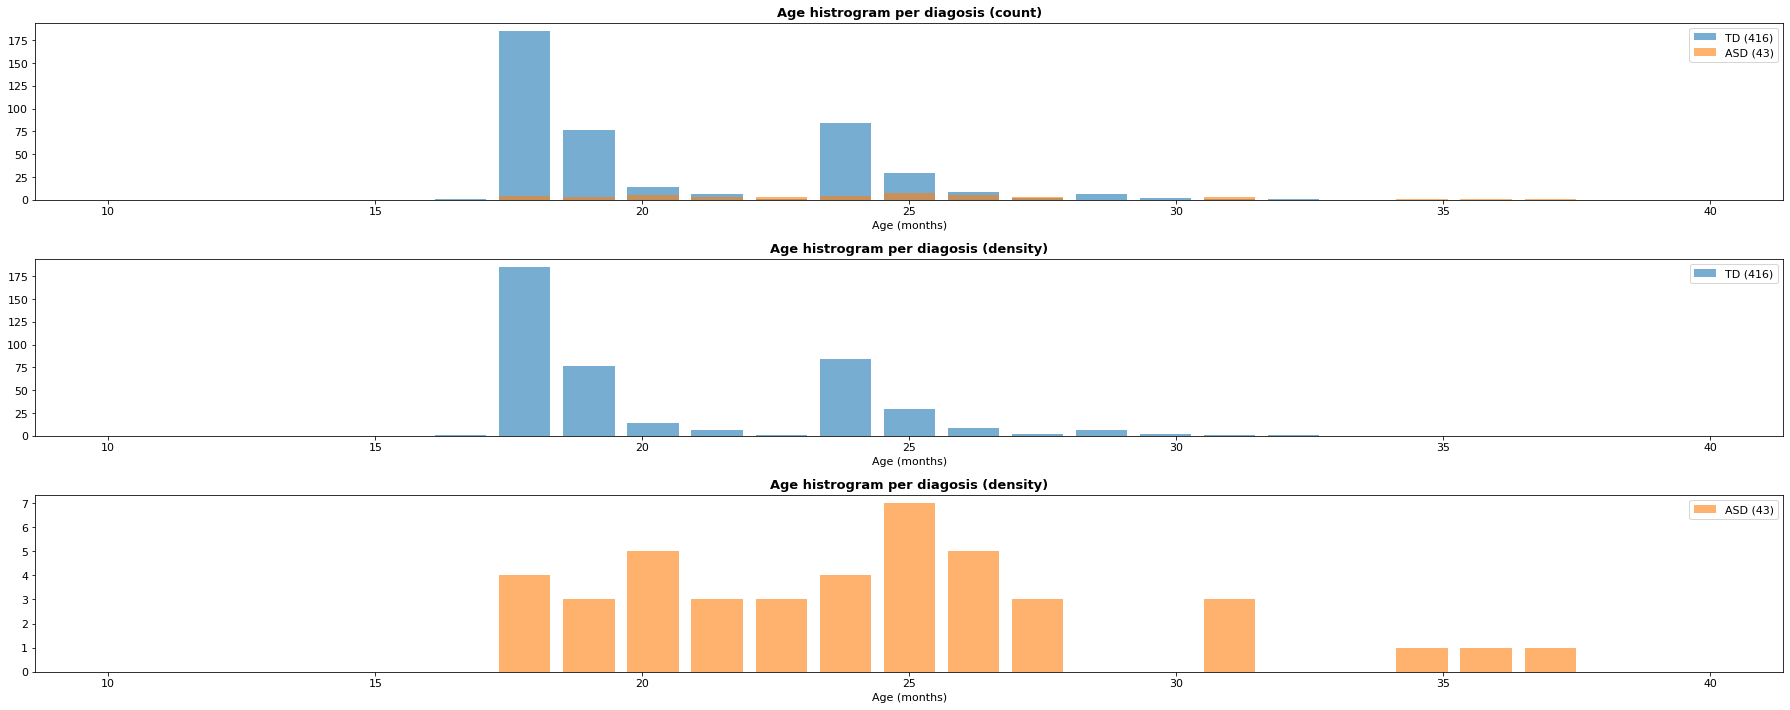

In [205]:
df=data.df
DIAG_DICT = {'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3.}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'comorbid':'#9467bd'}

           
    
fig, axes = plt.subplots(3, 1, figsize=(25, 10)); axes=axes.flatten()

for i, d in df.groupby('diagnosis'):
    axes[0].hist(d['age'], bins=np.linspace(10, 40, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label="{} ({})".format(DIAG_DICT_REVERSE[i], len(d['age'])))
axes[0].legend(); axes[0].set_title("Age histrogram per diagosis (count)", weight='bold', fontsize=13); axes[0].set_xlabel("Age (months)")

for i, d in df.groupby('diagnosis'):
    axes[int(i+1)].hist(d['age'], bins=np.linspace(10, 40, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label="{} ({})".format(DIAG_DICT_REVERSE[i], len(d['age'])))
    axes[int(i+1)].legend(); axes[int(i+1)].set_title("Age histrogram per diagosis (density)", weight='bold', fontsize=13);axes[int(i+1)].set_xlabel("Age (months)")
plt.tight_layout()

In [214]:
for diag, d in df.groupby('diagnosis'):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {}".format(diag, sex, len(dd)))

Diagnosis: 0.0 - Sex: 0.0 : 210
Diagnosis: 0.0 - Sex: 1.0 : 206
Diagnosis: 1.0 - Sex: 0.0 : 32
Diagnosis: 1.0 - Sex: 1.0 : 11


In [215]:
n_asd = 43
n_td = 416

print(32/43)
print(210/416)

0.7441860465116279
0.5048076923076923


In [217]:
43/459

0.09368191721132897

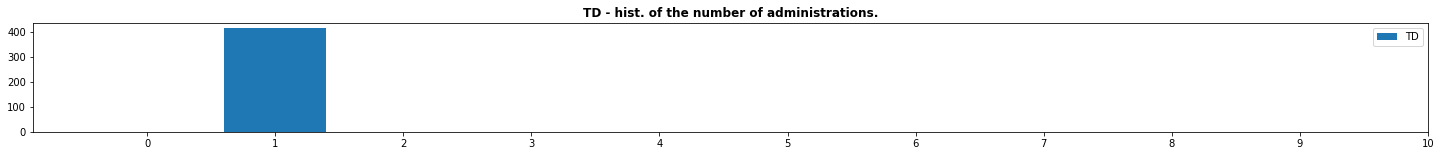

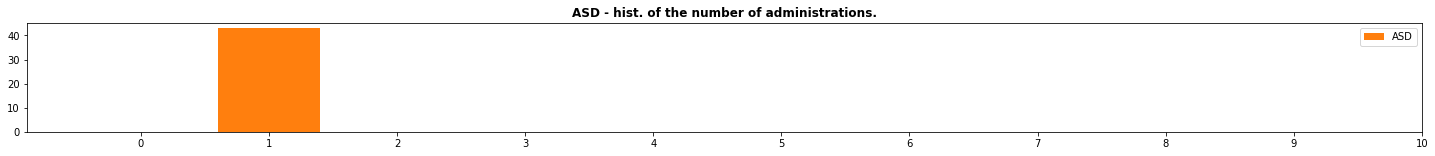

In [ ]:
for i, d in df.groupby('diagnosis'):
    plt.figure(figsize=(25, 2)), 
    plt.hist(d.groupby("id")['diagnosis'].count().to_numpy(), bins = np.linspace(0, 10 , 11), rwidth=.8,color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
    plt.xticks(ticks=np.linspace(0, 10 , 11)+.5, labels=np.linspace(0, 10 , 11).astype(int));plt.legend()
    plt.title("{} - hist. of the number of administrations.".format(DIAG_DICT_REVERSE[i]), weight='bold')

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

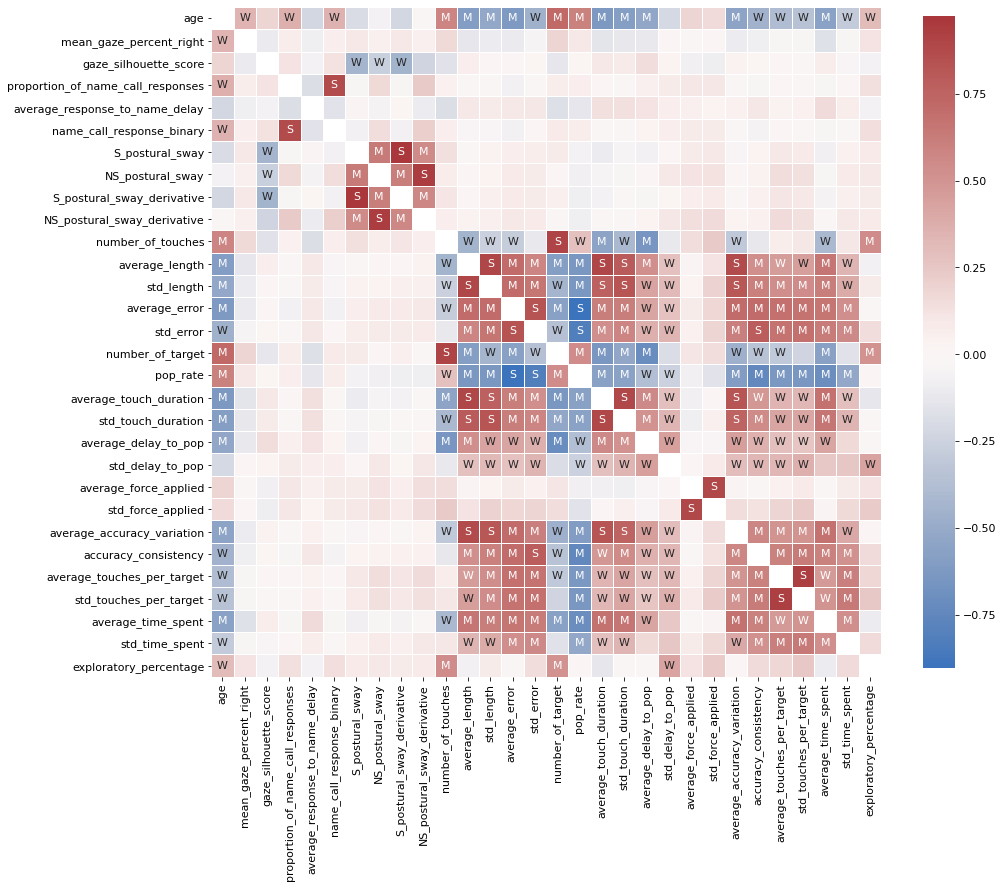

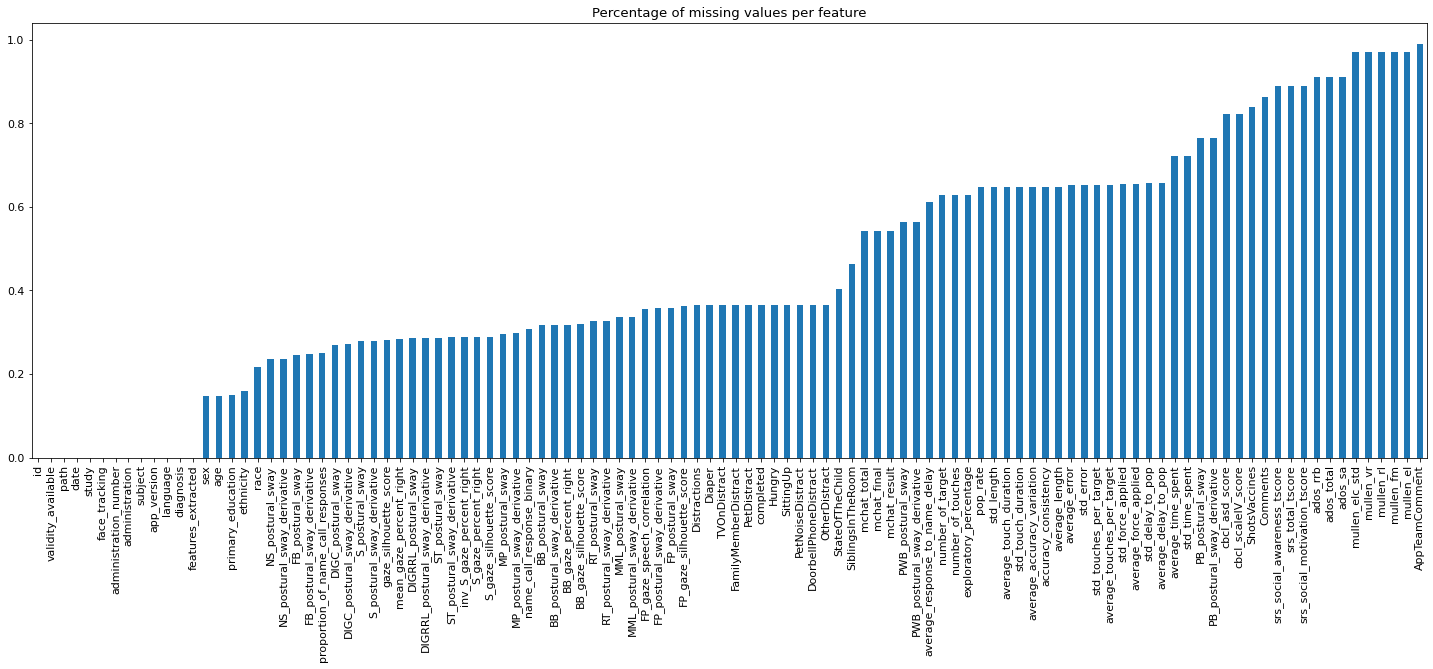

In [108]:
import missingno as msno
df_X = df[['age'] + data.features_name]


def custom_spearmanr(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').correlation


# Computes feature correlation
df_corr = df_X.corr(method=custom_spearmanr)

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

plt.figure()
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(25, 8),
    title="Percentage of missing values per feature")

In [17]:
df[df['diagnosis']==1].isna().mean()

id                             0.000000
diagnosis                      0.000000
language                       0.000000
app_version                    0.000000
subject                        0.000000
                                 ...   
S_postural_sway_derivative     0.069767
NS_postural_sway_derivative    0.000000
gaze_silhouette_score          0.069767
inv_S_gaze_percent_right       0.093023
mean_gaze_percent_right        0.093023
Length: 108, dtype: float64

<AxesSubplot:title={'center':'Difference of average missing data per columns ASD-NT (the lower, the more the feature is missing for the TD comapred to the ASD'}>

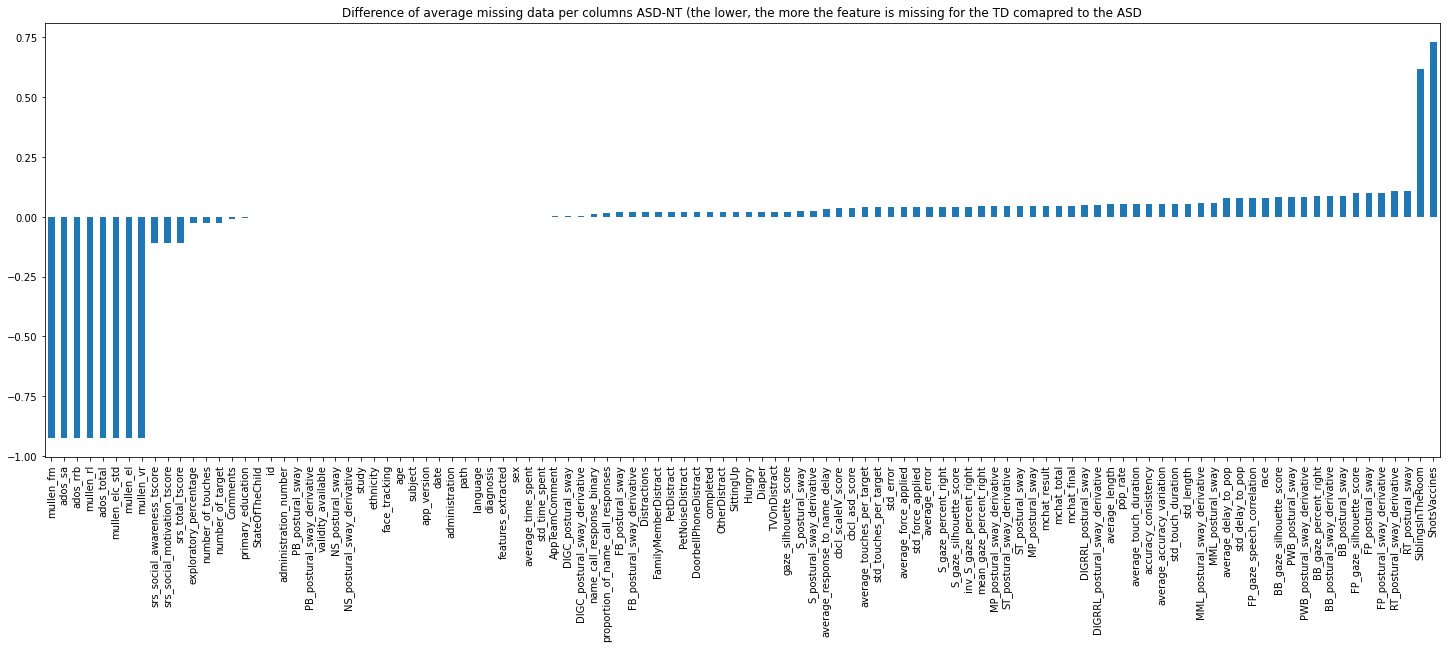

In [18]:
(df[df['diagnosis']==1].isna().mean() - df[df['diagnosis']==0].isna().mean()).sort_values().plot(
    kind="bar", figsize=(25, 8),
    title="Difference of average missing data per columns ASD-NT (the lower, the more the feature is missing for the TD comapred to the ASD")

In [19]:
df_X_asd = df[df['diagnosis']==1][data.features_name]
df_X_td = df[df['diagnosis']==0][data.features_name]

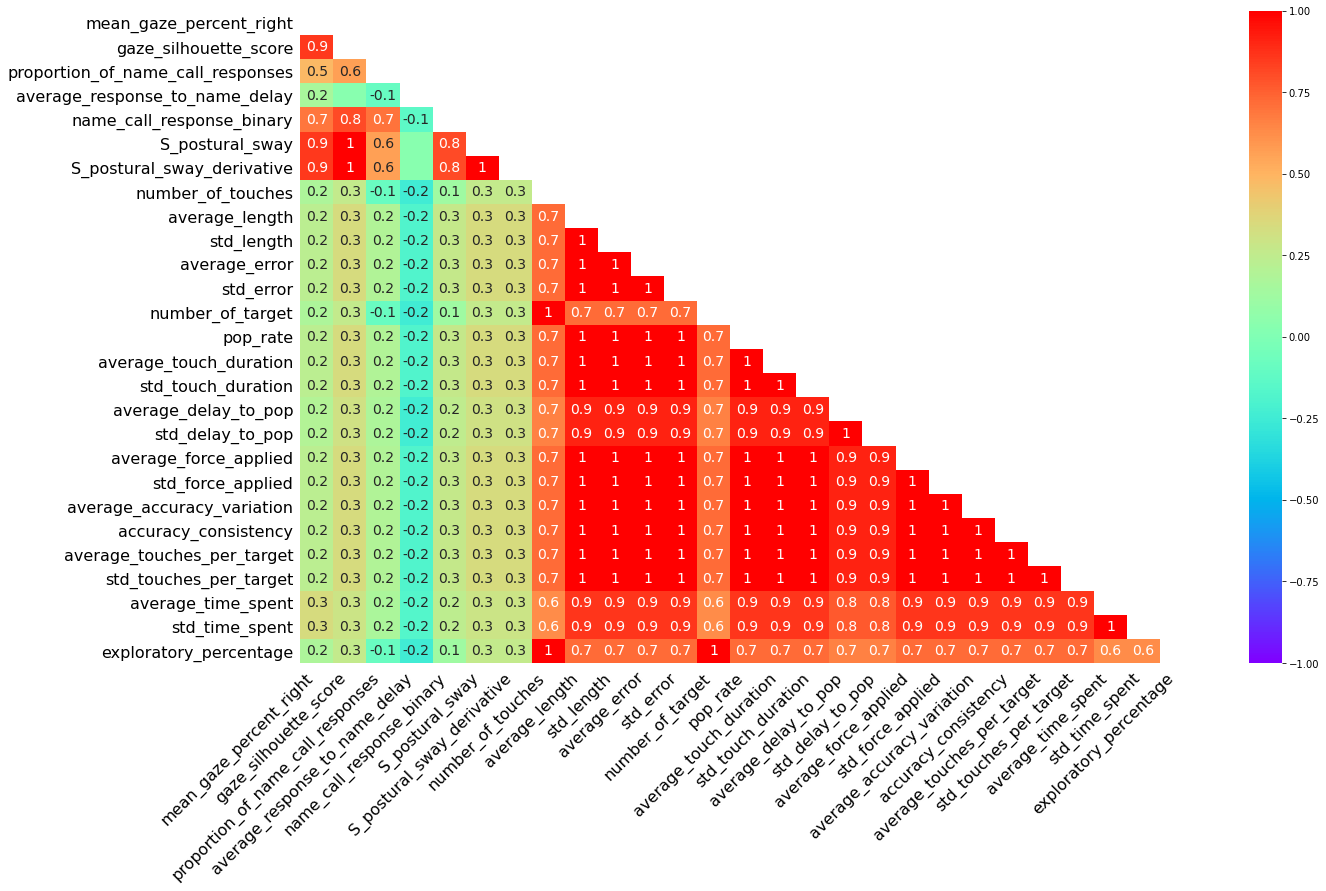

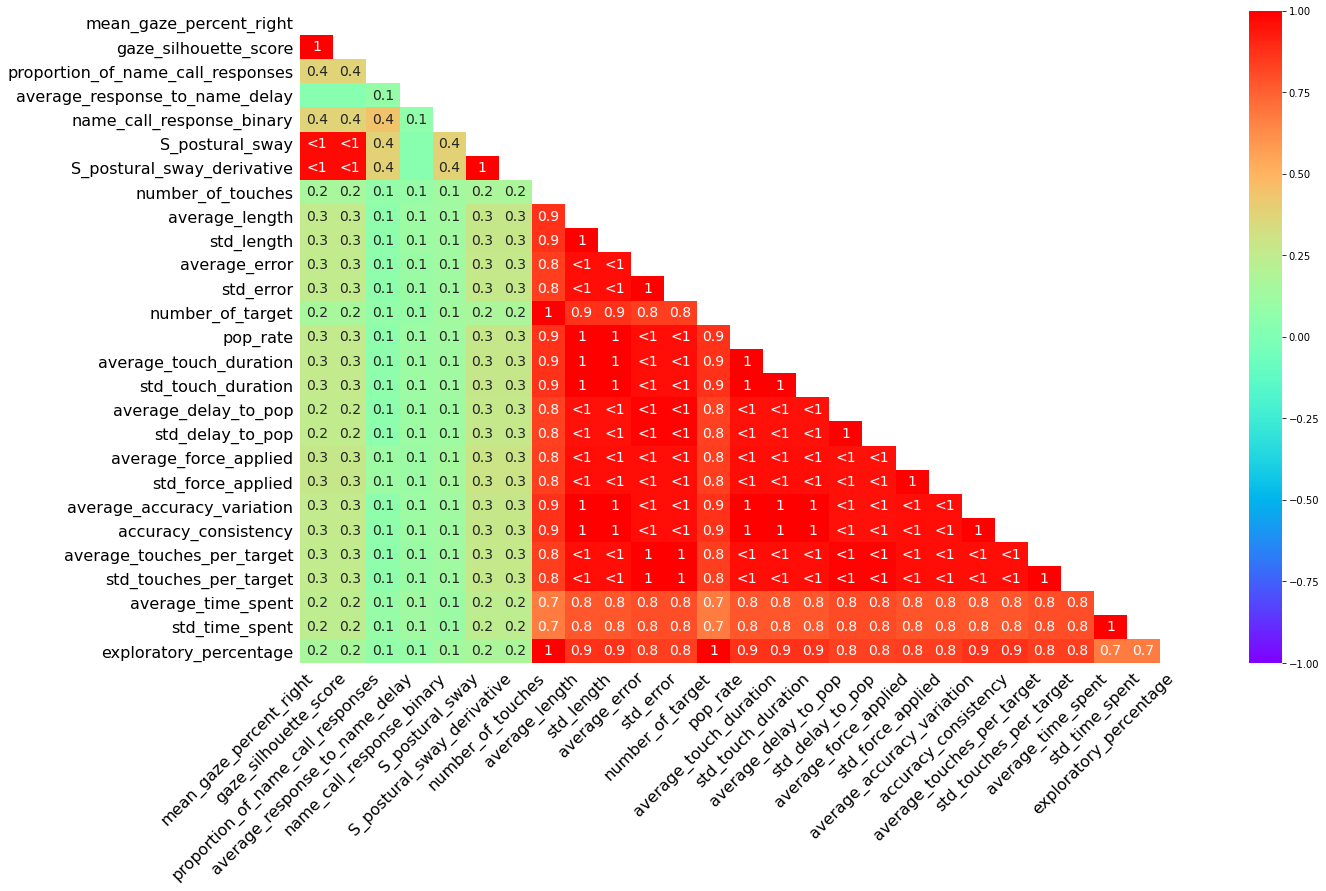

In [24]:
msno.heatmap(df_X_asd, cmap='rainbow');
msno.heatmap(df_X_td, cmap='rainbow');

In [211]:
#msno.dendrogram(df_X)

In [26]:
display(data.df.groupby('diagnosis')[['age', 'sex']].describe())

    
    

age                                                                                sex                                             
           count       mean       std        min        25%        50%        75%        max  count      mean       std  min  25%  50%  75%  max
diagnosis                                                                                                                                       
0.0        416.0  20.505202  3.134623  17.147541  18.098361  18.557377  24.000000  32.327869  416.0  0.495192  0.500579  0.0  0.0  0.0  1.0  1.0
1.0         43.0  24.265345  4.717926  18.065574  20.459016  24.000000  26.081967  36.852459   43.0  0.255814  0.441481  0.0  0.0  0.0  0.5  1.0

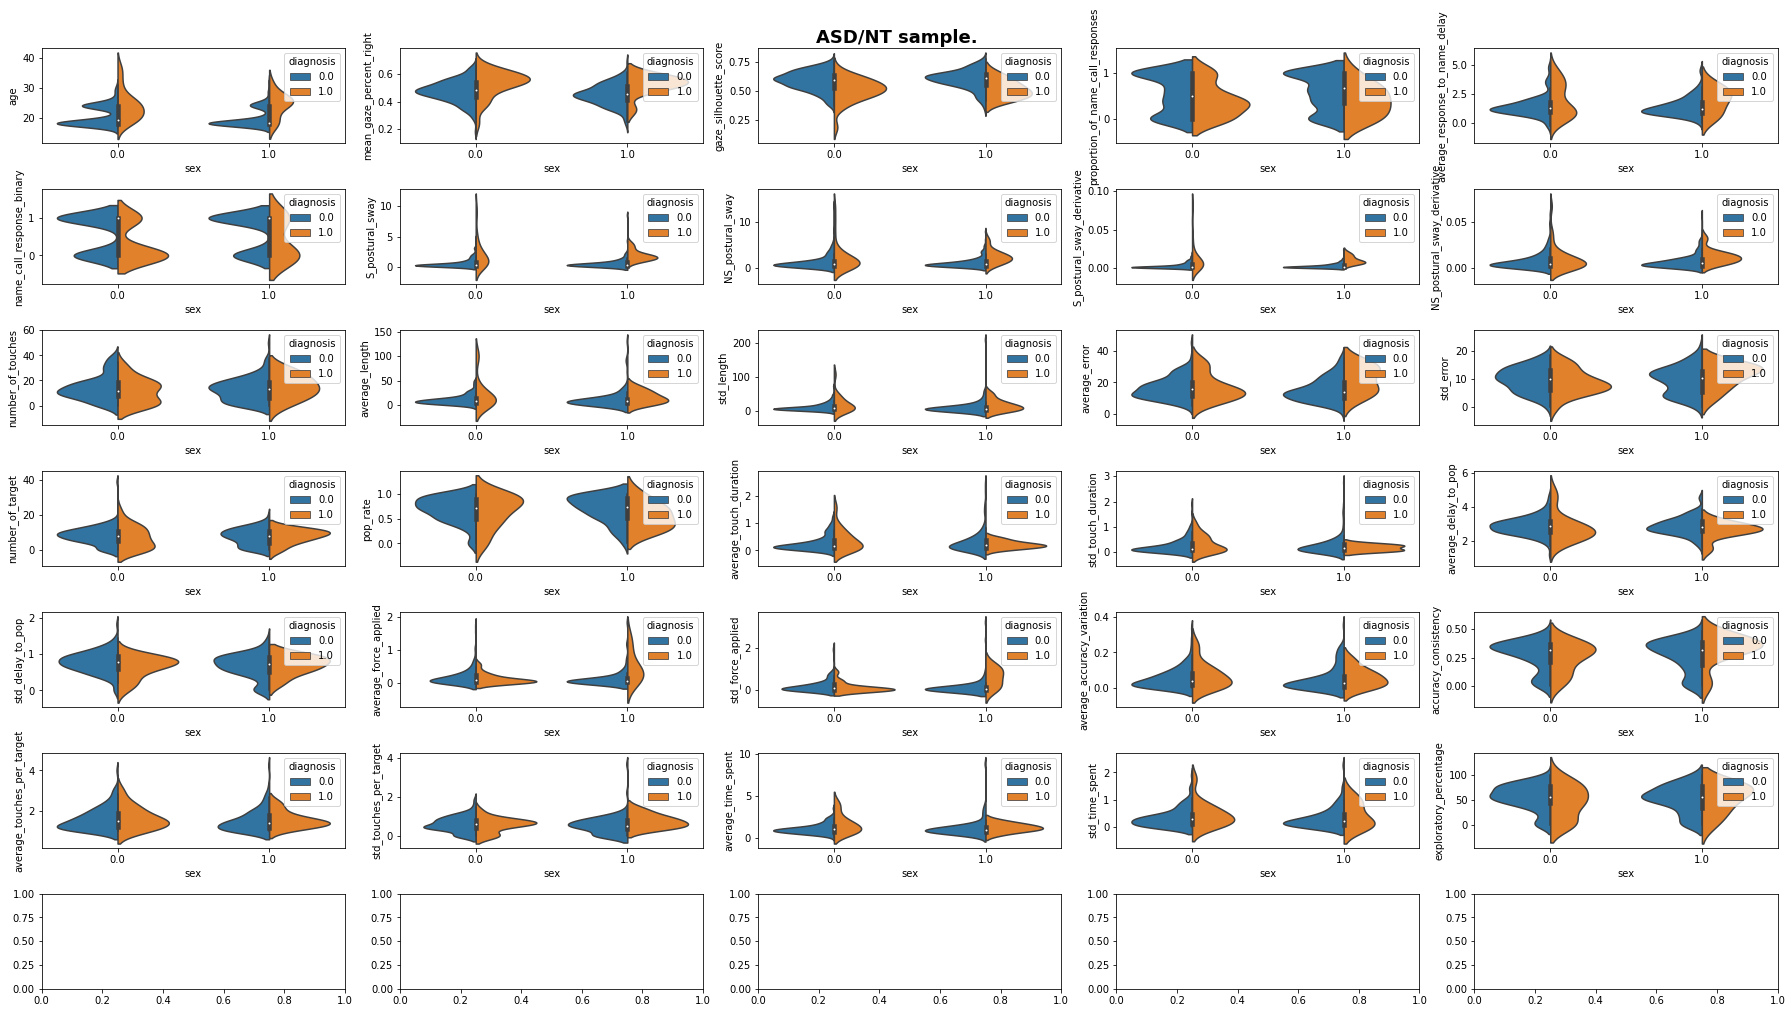

In [29]:
set_of_features  = {'asd_td_age_matched_n_balanced':["S_postural_sway", "mean_gaze_percent_right", "proportion_of_name_call_responses", "gaze_silhouette_score", "NS_postural_sway_derivative", "average_length"],
                    'asd_td_age_matched_n_unbalanced': ["S_postural_sway", "mean_gaze_percent_right", "NS_postural_sway", "proportion_of_name_call_responses", "NS_postural_sway_derivative", "gaze_silhouette_score"]}

selected_features = ['age'] + data.features_name



# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=5, nrows=len(selected_features)//5 +1, figsize=(25, 14))
fig.suptitle("ASD/NT sample.", weight='bold', fontsize=18)
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=data.df, y=col, x='sex', hue='diagnosis', palette="tab10",
                   split=True, ax=ax)
plt.tight_layout()

In [170]:
age_cutoff_list = np.linspace(36, 70, 70-36+1)
number_asd = []
number_td  =[]
age_mean_difference = []
for age in age_cutoff_list:
    df =  pd.read_csv(AUTISM_DATA_PATH)


    data = Dataset(df=df, 
                   missing_data_handling='without', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                    features_name = DEFAULT_PREDICTORS, 
                    scale_data=False,
                    use_missing_indicator_variables=use_missing_indicator_variables,#grouped_missing_features,
                   verbosity=0,
                   scenario=None,#'papers',
                   proportion_train=1)


    data.filter(administration={'studies':  ['ARC', 'P1', 'P2', 'P3'],
                                            'order': 'first',
                                            'completed': True}, 
                               demographics={'age':[17, age]},
                                clinical={'diagnosis': [0, 1]},
                                verbose=False)

    number_asd.append(len(data.df[data.df['diagnosis']==1]))
    number_td.append(len(data.df[data.df['diagnosis']==0]))
    age_mean_difference.append(data.df[data.df['diagnosis']==1]['age'].mean() - data.df[data.df['diagnosis']==0]['age'].mean())

    

(array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

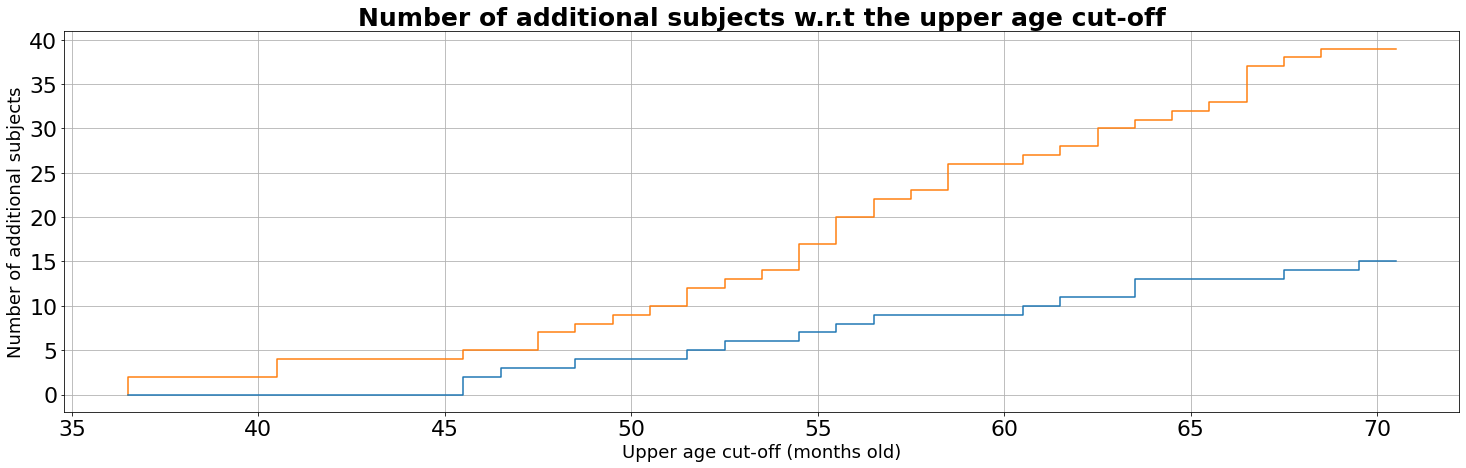

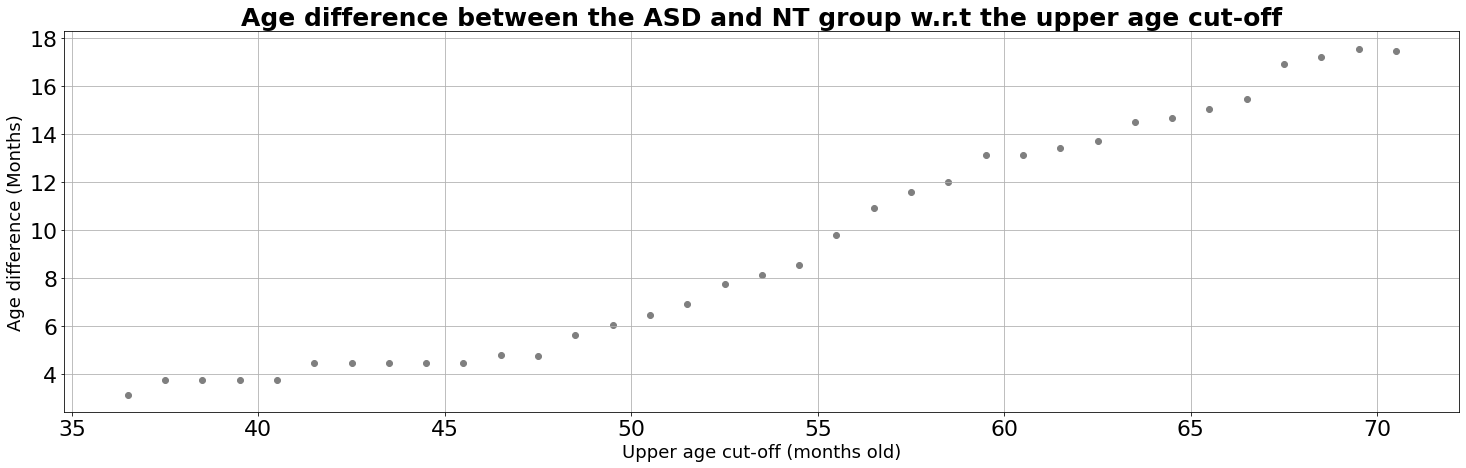

In [211]:
fi(25, 7)
plt.step(np.array(age_cutoff_list)+.5, np.array(number_asd)-number_asd[0], color='tab:orange')
plt.step(np.array(age_cutoff_list)+.5, np.array(number_td)-number_td[0], color='tab:blue')
plt.grid()
plt.title("Number of additional subjects w.r.t the upper age cut-off", weight='bold',fontsize=25)
plt.xlabel("Upper age cut-off (months old)",fontsize=18); plt.ylabel("Number of additional subjects",fontsize=18); 
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

fi(25, 7)
plt.title("Age difference between the ASD and NT group w.r.t the upper age cut-off", weight='bold',fontsize=25)
plt.scatter(np.array(age_cutoff_list)+.5, np.array(age_mean_difference), color='tab:gray')
plt.xlabel("Upper age cut-off (months old)",fontsize=18); plt.ylabel("Age difference (Months)",fontsize=18); 
plt.grid()

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


# Experiments - without Feature Selection

* This section aims at answering a few questions related to the different algorithms used, with the aim of optimizing our classification framework.

**Parameters or potential settings**

* The approach used, which could be Logistic Regression, Decision Tree, Explainable Boosting Machine, Neural Additive models, or XGBoost.
* The use or not of indicator variables as inputs. 
* The scaling of the data. 
* The imputation approach when the learning algorithms does not handle them by design. It could be constant imputation (called encoding here), or conditional imputation (mean, knn, or mice).
* The sampling method in the case of imbalance learning (either no down-sampling, vanilla (random sampling of the minority class until classes are balanced), or SMOTE (a more elaborated sampling).
* The number of features, between 2 and 6. 
* The number of folds when cross-validating the results. 

**Notes on the classification pipeline:**

* Two datasets are age-matched but one (scenario `asd_td_age_matched_n_balanced`) lead to relatively balanced classes, whereas the scenario `asd_td_age_matched_n_unbalanced` has slightly younger kids and so leverage the amount of young neuro-typical kids, and is more unbalanced. 
* No searches on hyper-parameters are performed on each of the approach. Cross-validation is performed with the stratified inner-fold being left-out, the model is fitted on the training set, and the prediction of the test set is done with predictions stored for later evaluation of performances. 
* since a lot of settings parameters are tested, we test all of the hypothesis with a default setting that is: Encoding of the missing variables, scaling of the data, no use of indicator variables, no down-sampling (???), and a 16-fold cross-validation.
* Features selection were made for the two scenario suing the features with the higher importance based on xgboost importance map.
* Classification here is between autistic and neurotypical participants.



**Among the questions at stakes:**

* Experiment 1: Shall we use indicator variables? For each scenario (columns of axes), ad each dimension of the problem (rows of axes) , x is the `use_of_indicator_variables`, y is an indicator of performances (typically the F1 score), and the hue variable are the approaches. The plots are performed for no imputations, 
* Experiement 2: Shall we scale data or not ? 
* Experiment X: for the algorithms handling missing variables (xgboost, nam with encoding) , shall we let them be missing, or imputed ? 

# Experiments - With Features selection


In [419]:
from utils import create_autism_df
df = create_autism_df(folder_names = ['papery_experiment_1_fs', 'paper_experiment_2_fs', 'paper_experiment_3_fs', 'paper_experiment_4_fs'])




100%|██████████| 138/138 [00:16<00:00,  8.50it/s]


## Analysis of the metrics correlations

In [362]:
metrics = ['AUROC', 'AUC-PR', 'AUC-PR-Gain', 'AUC-PR-Corrected', 'AUC-PR-Gain-Corrected', 'F1', 'F1 score Corrected', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'NPV']

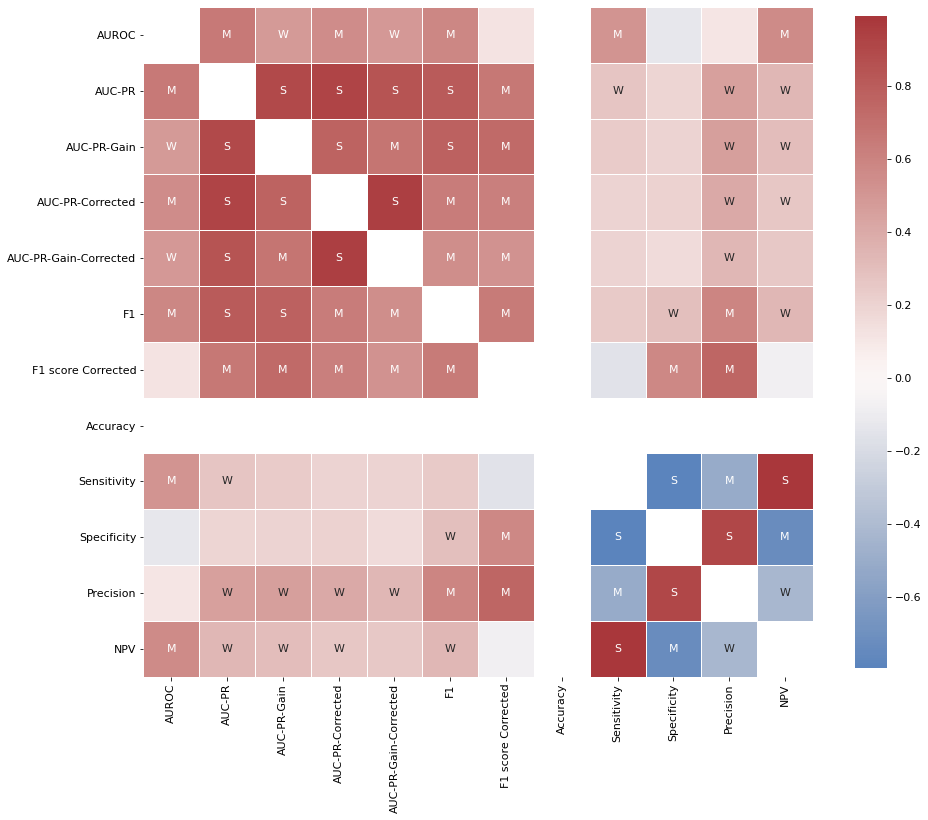

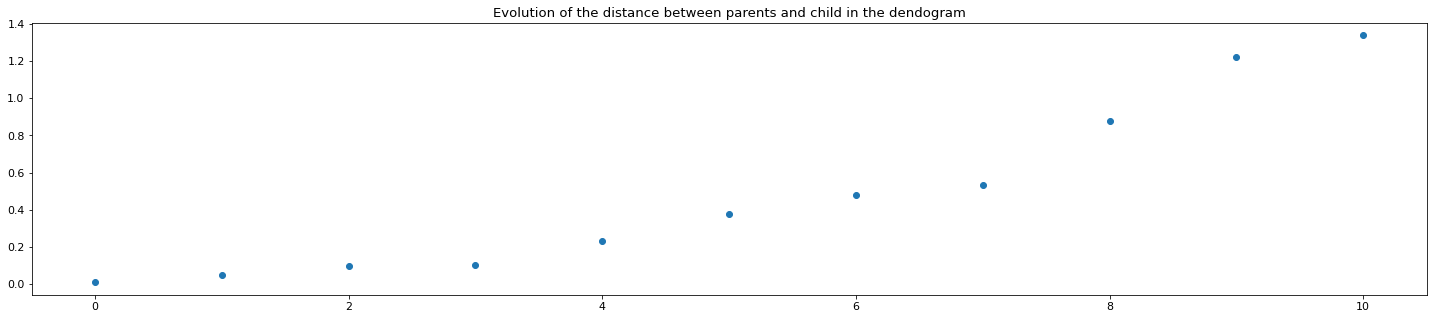

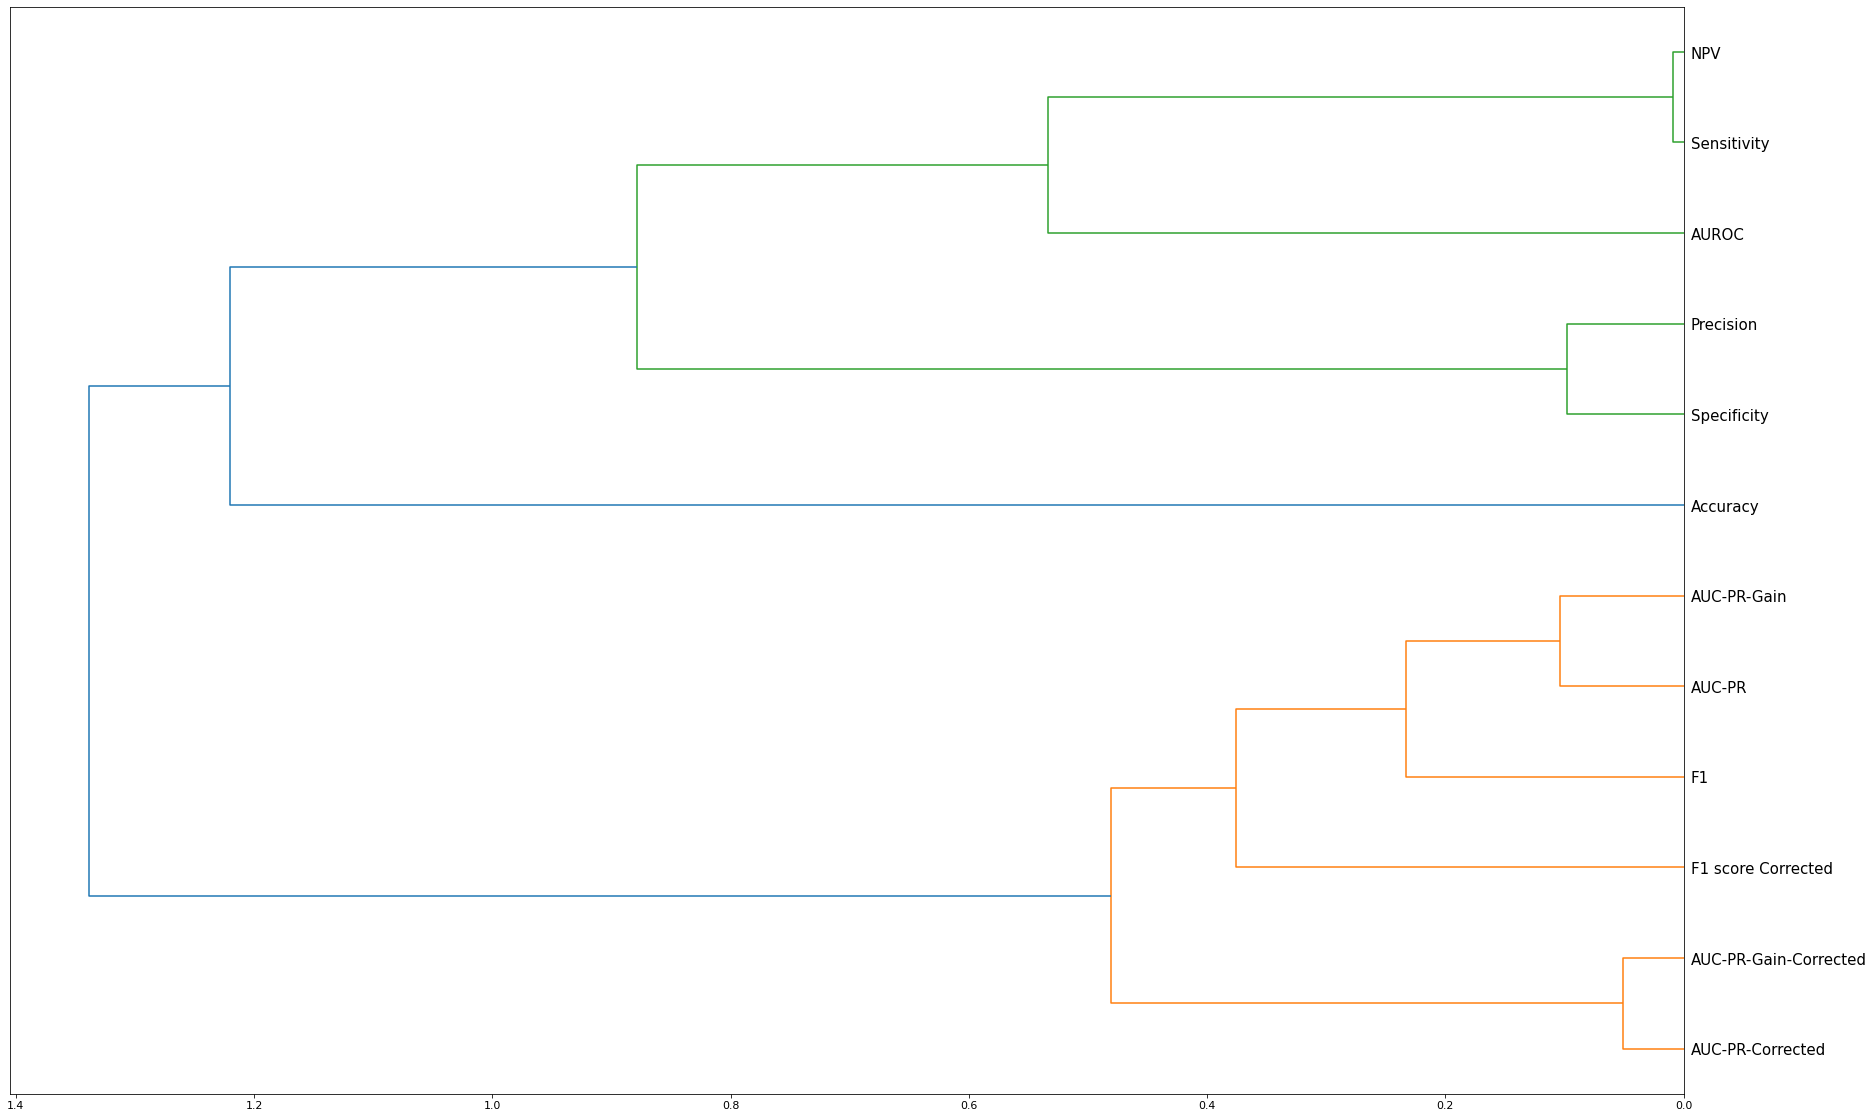

In [363]:
from collections import defaultdict
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

def custom_spearmanr(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').correlation


df_X = df[metrics]

# Computes feature correlation
df_corr = df_X.corr(method=custom_spearmanr)
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});
    
    
    
corr = spearmanr(df[metrics].values, nan_policy='omit').correlation
corr = np.nan_to_num(corr)

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)


dist_linkage = hierarchy.ward(squareform(distance_matrix))
fi(25, 5)
plt.scatter(np.arange(len(dist_linkage[:,2])), dist_linkage[:,2])
plt.title("Evolution of the distance between parents and child in the dendogram")

fig,ax1 = plt.subplots(1, 1, figsize=(30, 20))
dendro = hierarchy.dendrogram(dist_linkage, labels=metrics, ax=ax1, orientation='left', leaf_rotation=0, leaf_font_size=15)




## Experiment 1.  `use_missing_indicator_variables`

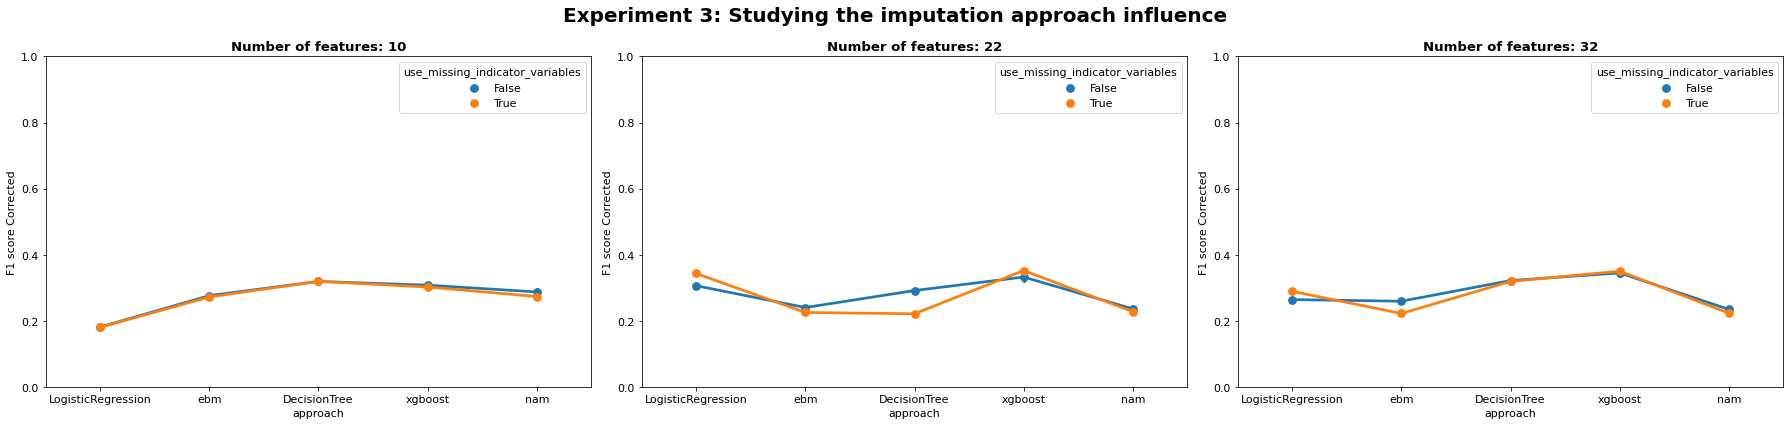

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]


        axes[i] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue='use_missing_indicator_variables', ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

    plt.tight_layout()

In [376]:
df = create_autism_df(folder_names = ['paper_experiment_1_fs', 'paper_experiment_1_fs_custom_missing_1_per_1', 'paper_experiment_1_fs_custom_missing'])#'papery_experiment_1_fs', 'paper_experiment_2_fs', 'paper_experiment_3_fs', 'paper_experiment_4_fs'])

100%|██████████| 161/161 [00:19<00:00,  8.34it/s]


In [411]:
df = create_autism_df(folder_names = ['paper_experiment_1_fs', 'paper_experiment_1_fs_custom_missing_1_per_1', 'paper_experiment_1_fs_custom_missing'])#'papery_experiment_1_fs', 'paper_experiment_2_fs', 'paper_experiment_3_fs', 'paper_experiment_4_fs'])df = create_autism_df(folder_names = ['paper_experiment_1_fs', 'paper_experiment_1_fs_custom_missing_1_per_1', 'paper



100%|██████████| 161/161 [00:18<00:00,  8.52it/s]


In [412]:
df = df[df['approach'] == 'ebm']


df.loc[df['dataset_name'] == 'paper_experiment_1_fs_custom_missing', 'n_features'] -=1

df.loc[df[~(df['use_missing_indicator_variables']).isin([True, False])].index, 'n_features'] = 2*df.loc[df[~(df['use_missing_indicator_variables']).isin([True, False])].index, 'n_features']

df.loc[df[~(df['use_missing_indicator_variables']).isin([True, False])].index, 'using_Z'] = 'custom'
df.loc[df[(df['use_missing_indicator_variables']).isin([True])].index, 'using_Z'] = 'All'
df.loc[df[(df['use_missing_indicator_variables']).isin([False])].index, 'using_Z'] = 'None'
df.loc[df['dataset_name'] == 'paper_experiment_1_fs_custom_missing', 'using_Z'] = 'Custom Statistically'


l = []
for i, row in df[~(df['use_missing_indicator_variables']).isin([True, False])].iterrows():
    l.append(list(row['use_missing_indicator_variables'].keys())[0])

df.loc[df[~(df['use_missing_indicator_variables']).isin([True, False])].index, 'Z_variable_used'] = l
df.loc[df[(df['use_missing_indicator_variables']).isin([True])].index, 'Z_variable_used'] = 'All'
df.loc[df[(df['use_missing_indicator_variables']).isin([False])].index, 'Z_variable_used'] = 'None'
df.loc[df['dataset_name'] == 'paper_experiment_1_fs_custom_missing', 'Z_variable_used'] = 'Custom Statistically'



In [413]:
x_order = ['None', 'All', 'Custom Statistically', 'Floating Bubbles','DogInGrassC','DogInGrassRRL','SpinningTop','Social gaze','PlayingWithBlocks','FunAtThePark','MechanicalPuppy','BlowingBubbles','RhymesAndToys','MakeMeLaugh','Game administration','No touches at all','Game grouped touches']

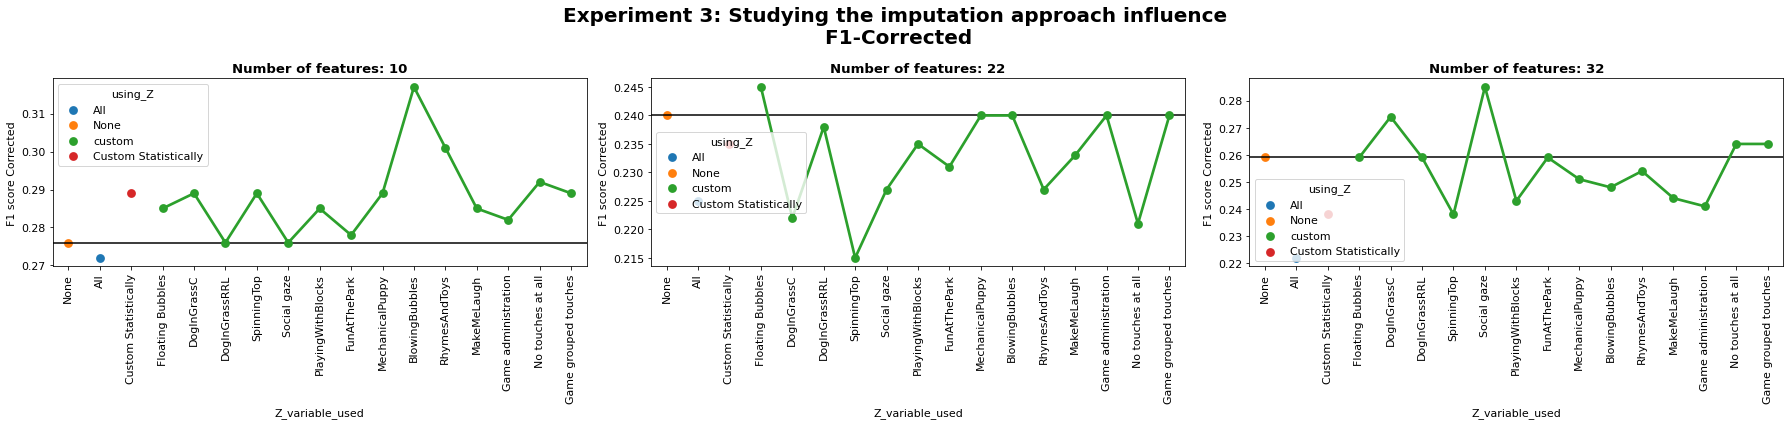

In [414]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence\n F1-Corrected", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['approach'] == 'ebm') &
                     (df['n_features'] == n_features)]


        axes[i] = sns.pointplot(data=results, x="Z_variable_used",  order=x_order, y="F1 score Corrected", hue='using_Z', hue_order=df['using_Z'].unique(), ci='sd', ax = axes[i])
        #axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')
        axes[i].axhline(results[results['using_Z']=='None']["F1 score Corrected"].values[0], color='k')
        for tick in axes[i].get_xticklabels():
            tick.set_rotation(90)


    plt.tight_layout()

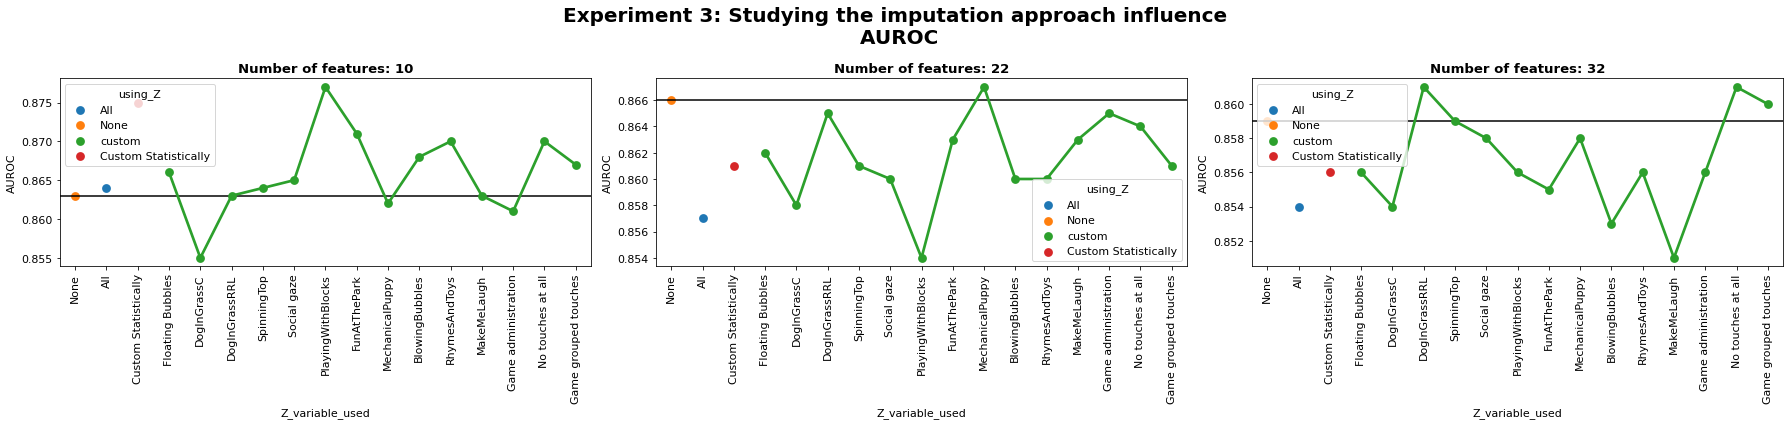

In [415]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence\n AUROC", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['approach'] == 'ebm') &
                     (df['n_features'] == n_features)]


        axes[i] = sns.pointplot(data=results, x="Z_variable_used",  order=x_order, y="AUROC", hue='using_Z', hue_order=df['using_Z'].unique(), ci='sd', ax = axes[i])
        #axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')
        axes[i].axhline(results[results['using_Z']=='None']["AUROC"].values[0], color='k')
        for tick in axes[i].get_xticklabels():
            tick.set_rotation(90)


    plt.tight_layout()

In [407]:
df = create_autism_df(folder_names = ['paper_experiment_1_fs', 'paper_experiment_1_fs_custom_missing'])#'papery_experiment_1_fs', 'paper_experiment_2_fs', 'paper_experiment_3_fs', 'paper_experiment_4_fs'])




100%|██████████| 47/47 [00:05<00:00,  7.91it/s]


In [ ]:
df.loc[df['dataset_name'] == 'paper_experiment_1_fs_custom_missing', 'n_features'] -=1

df.loc[df[df['dataset_name'] == 'paper_experiment_1_fs_custom_missing'].index, 'n_features'] = 2*df.loc[df[df['dataset_name'] == 'paper_experiment_1_fs_custom_missing'].index, 'n_features']

df.loc[df[(df['use_missing_indicator_variables']).isin([True])].index, 'using_Z'] = 'All'
df.loc[df[(df['use_missing_indicator_variables']).isin([False])].index, 'using_Z'] = 'None'
df.loc[df['dataset_name'] == 'paper_experiment_1_fs_custom_missing', 'using_Z'] = 'Custom Statistically'



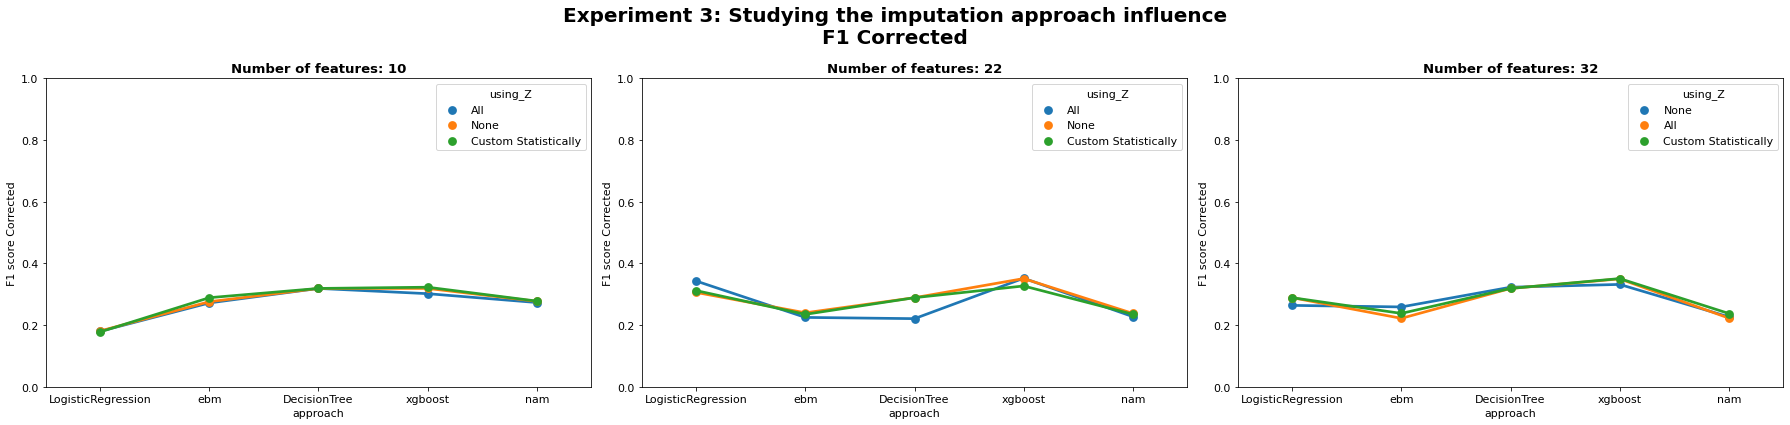

In [409]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence\nF1 Corrected", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]


        axes[i] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue='using_Z', ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

    plt.tight_layout()

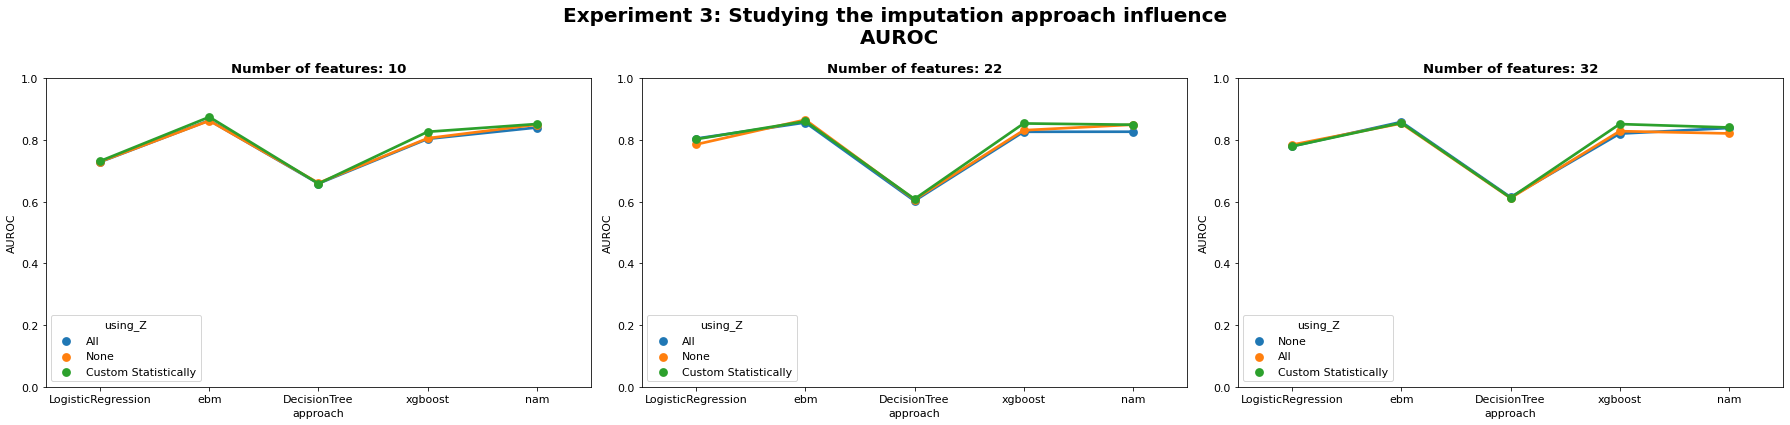

In [410]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence\n AUROC", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]


        axes[i] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="AUROC", hue='using_Z', ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

    plt.tight_layout()

## Experiment 2  `scale_data`

In [420]:
df['n_features'].unique()

array([22, 10, 32], dtype=object)

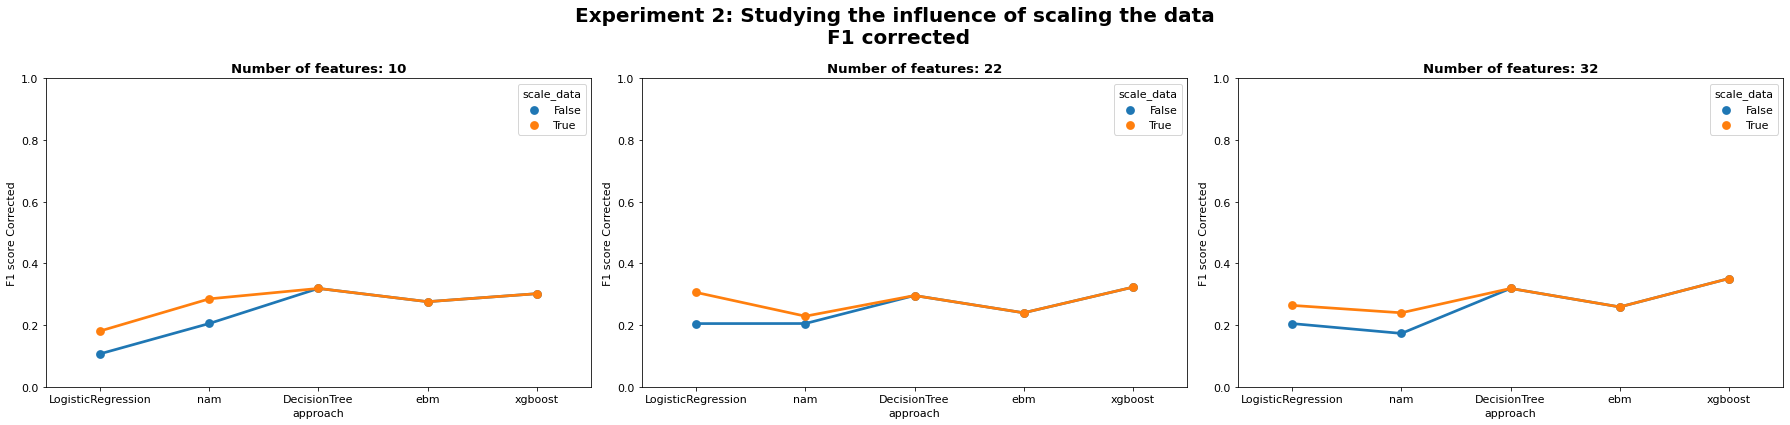

In [427]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 2: Studying the influence of scaling the data\n F1 corrected", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['dataset_name'] == 'paper_experiment_2_fs') &
                     
                     (df['sampling_method'] == 'without') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue

        #assert len(results) == 5*2

        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue='scale_data', ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

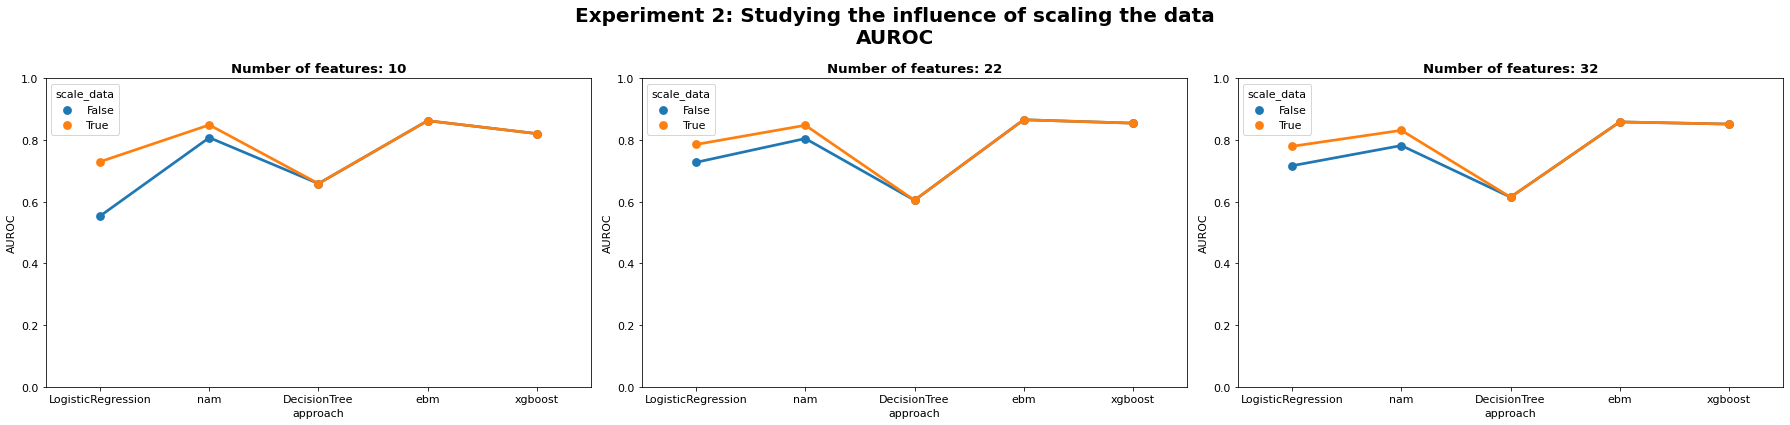

In [428]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 2: Studying the influence of scaling the data\nAUROC", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['dataset_name'] == 'paper_experiment_2_fs') &
                     (df['sampling_method'] == 'without') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue

        #assert len(results) == 5*2

        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="AUROC", hue='scale_data', ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

## Experiment 3. `Imputation approach`

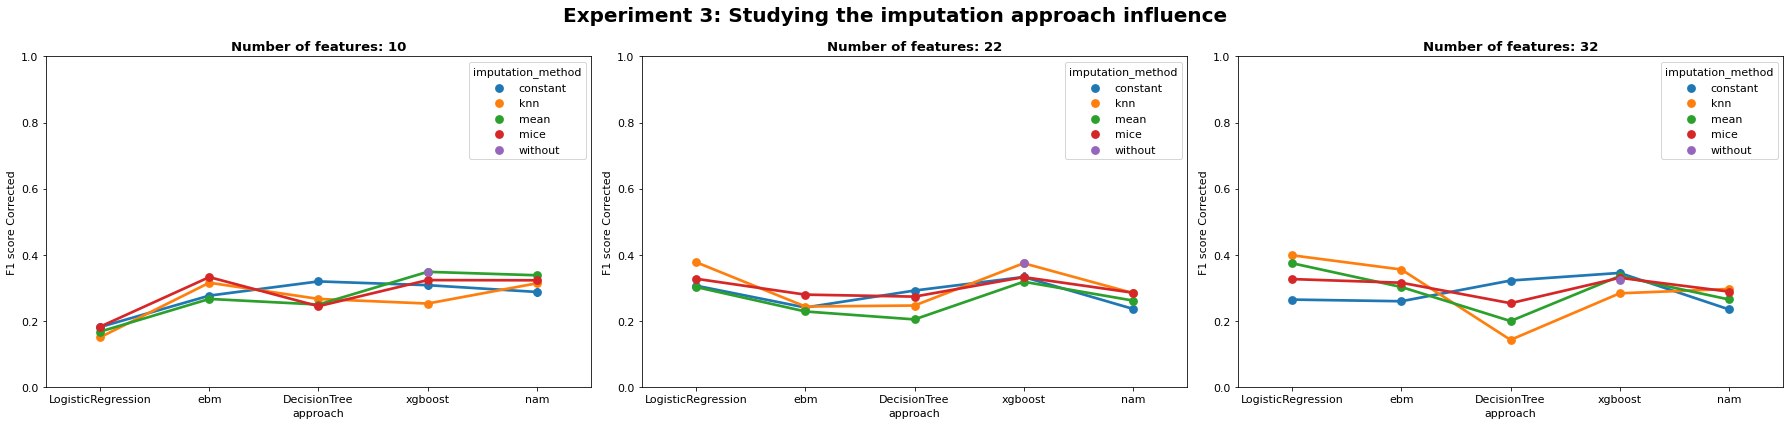

In [146]:
varying_condition = "imputation_method"


fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue

        results = results.sort_values(by='imputation_method')

        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue=varying_condition, ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

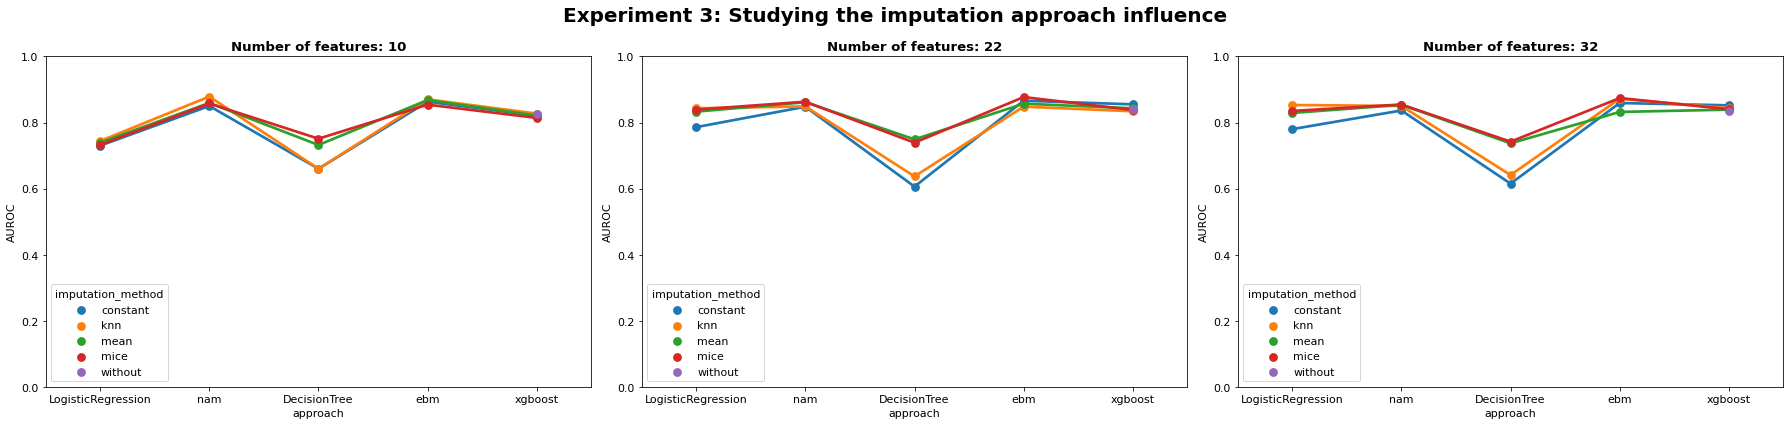

In [185]:
varying_condition = "imputation_method"


fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue

        results = results.sort_values(by='imputation_method')

        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="AUROC", hue=varying_condition, ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

## Experiment 4. `Sampling approach`

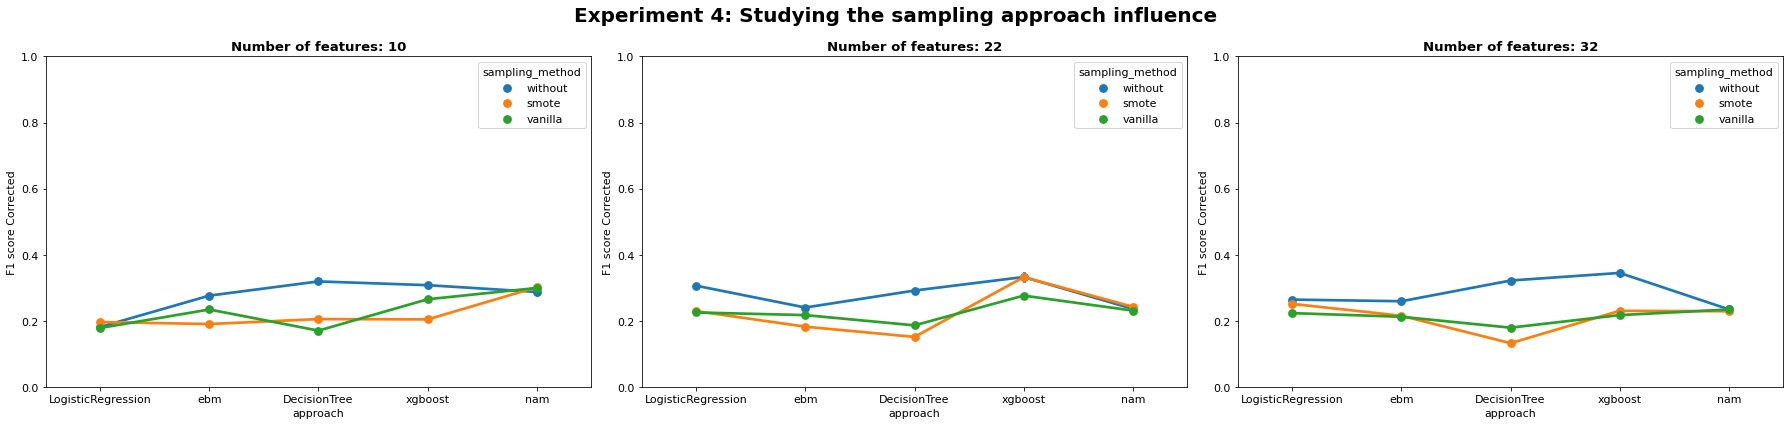

In [148]:
varying_condition = "sampling_method"


fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 4: Studying the sampling approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['scale_data'] == True) &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue
            
        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue=varying_condition, ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

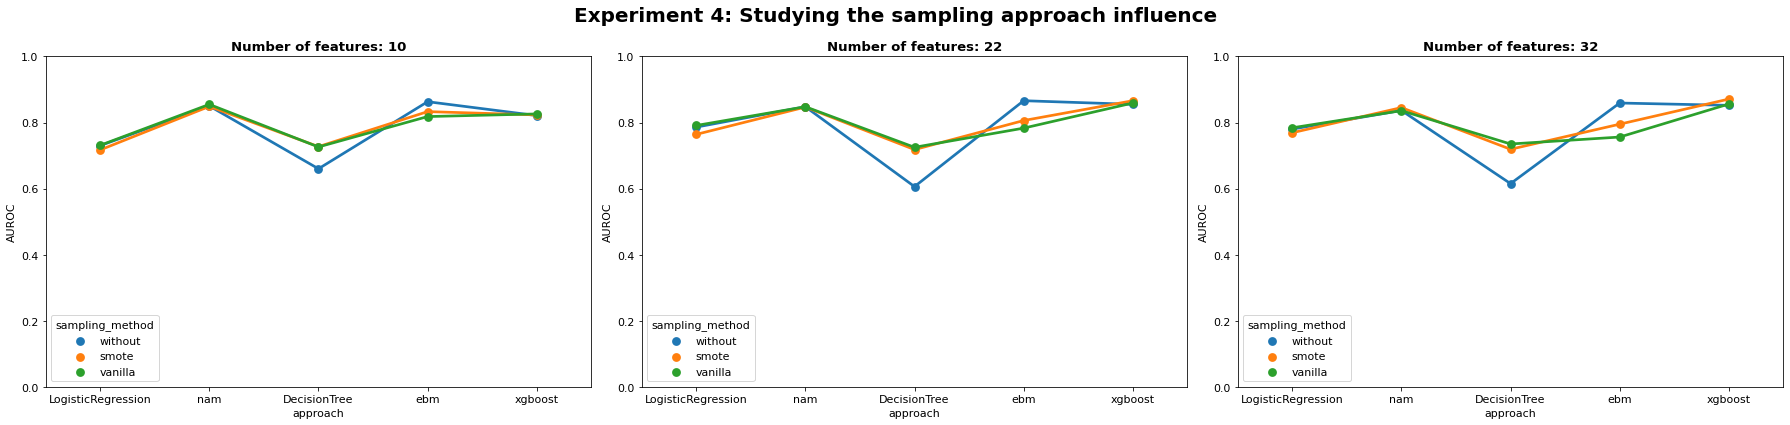

In [186]:
varying_condition = "sampling_method"


fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 4: Studying the sampling approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['scale_data'] == True) &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue
            
        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="AUROC", hue=varying_condition, ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

## Experiment 6. `n_features`

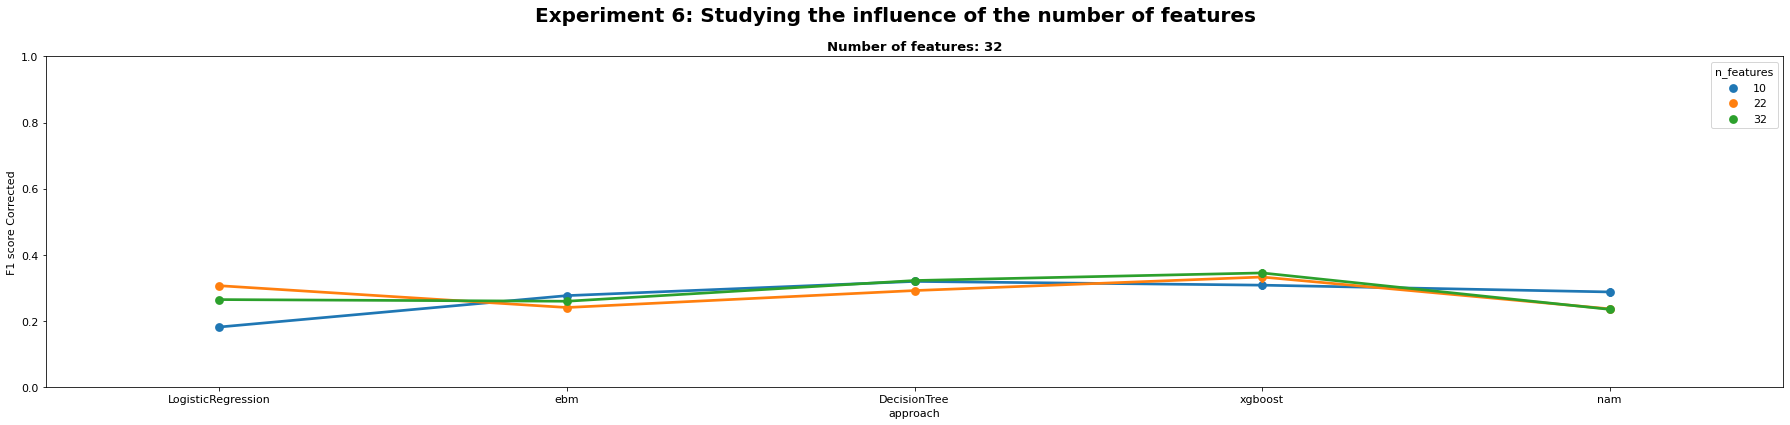

In [149]:

fig, axes = plt.subplots(1, 1, figsize=(25, 6))
fig.suptitle("Experiment 6: Studying the influence of the number of features", weight='bold', fontsize=20)


results = df[(df['missing_data_handling'] == 'encoding') &
             (df['use_missing_indicator_variables'] == False) &
             (df['scale_data'] == True) &
             (df['sampling_method'] == 'without') &
             (df['n_features'] != 1) &
             (df['scenario'] == 'papers')]


axes = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue='n_features', ci='sd', ax = axes)
axes.set_ylim([0,1])
axes.set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()

## Experiment 7. `approach`

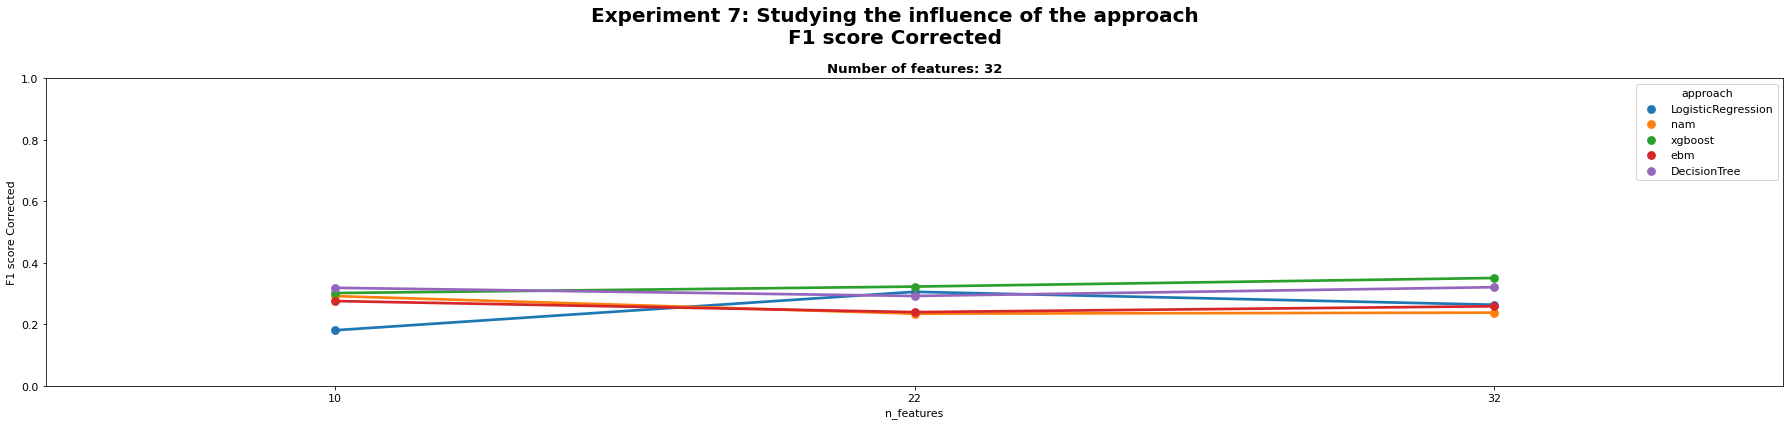

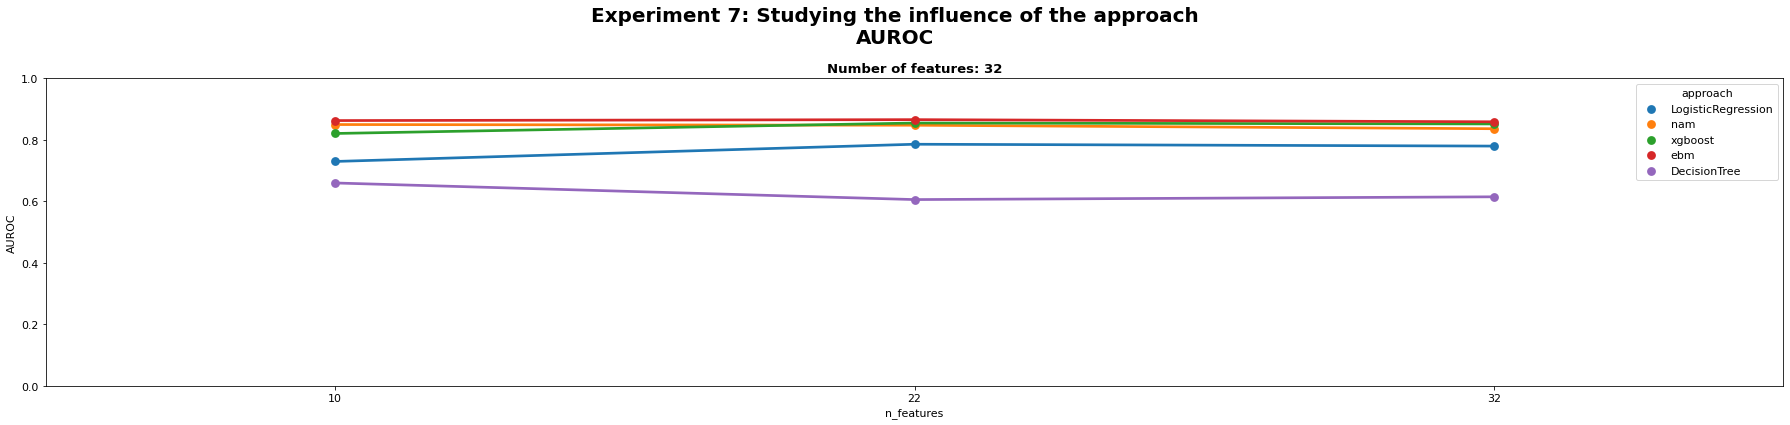

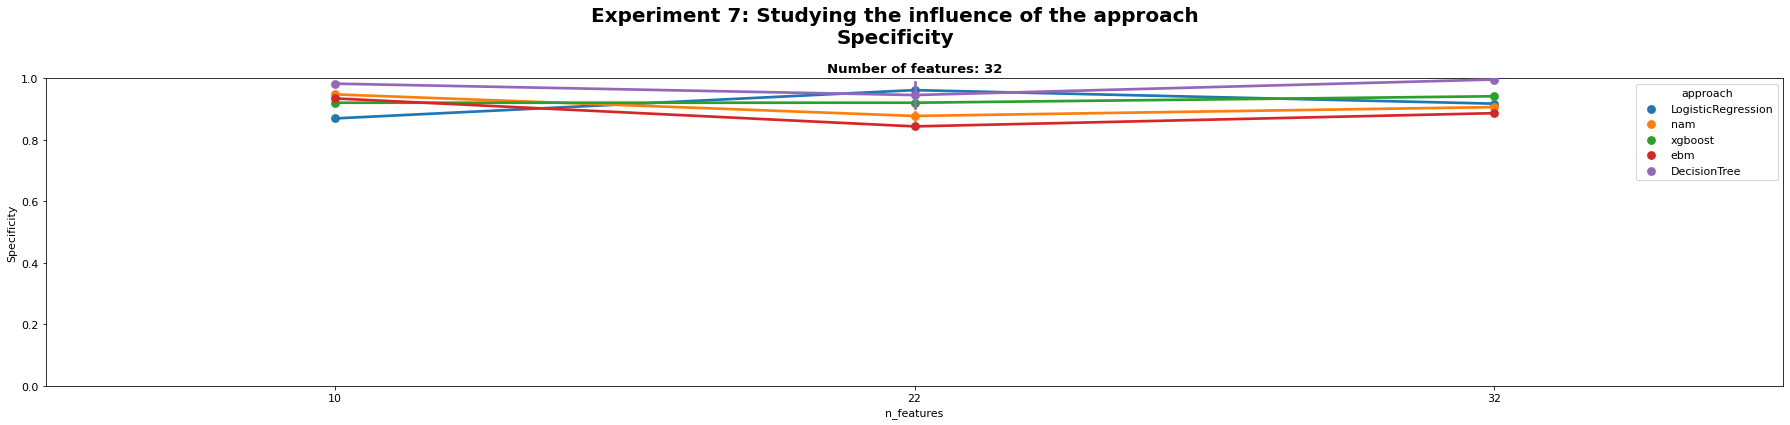

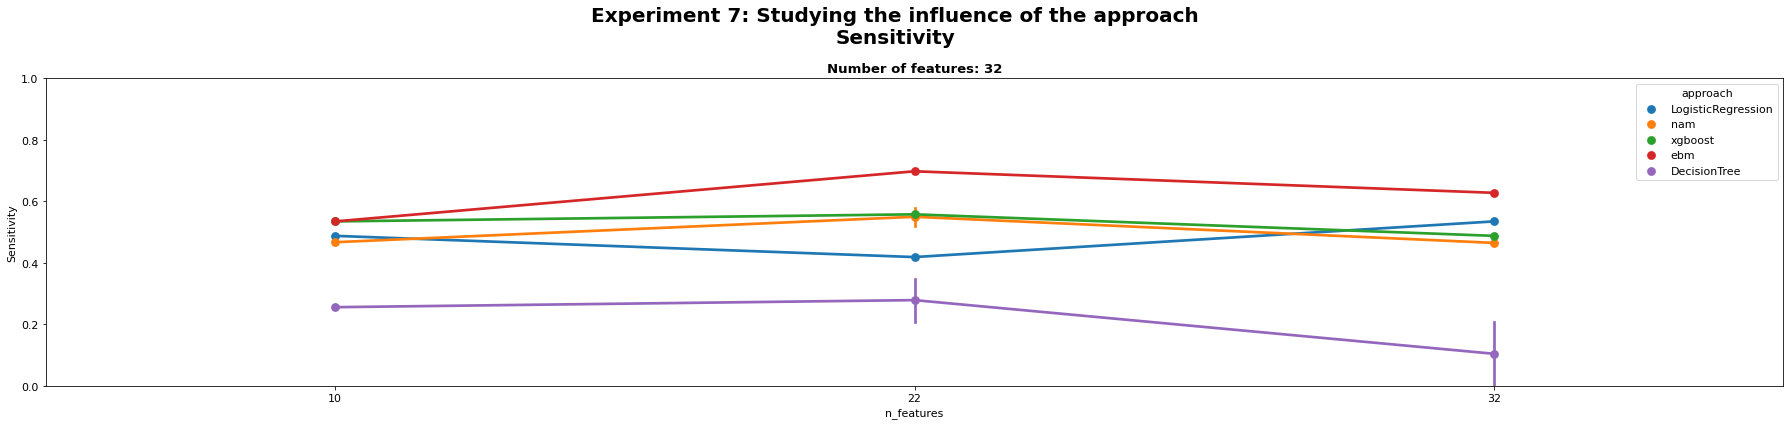

In [191]:
for metric in ['F1 score Corrected', 'AUROC', 'Specificity', 'Sensitivity']:
    fig, axes = plt.subplots(1, 1, figsize=(25, 6))
    fig.suptitle("Experiment 7: Studying the influence of the approach\n{}".format(metric), weight='bold', fontsize=20)


    results = df[(df['missing_data_handling'] == 'encoding') &
                 (df['use_missing_indicator_variables'] == False) &
                 (df['scale_data'] == True) &
                 (df['sampling_method'] == 'without') &
                 (df['n_features'] != 1) &
                 (df['scenario'] == 'papers')]


    axes = sns.pointplot(data=results, x="n_features", y=metric, hue='approach', ci='sd', ax = axes)
    axes.set_ylim([0,1])
    axes.set_title("Number of features: {}".format(n_features), weight='bold')

    plt.tight_layout()

In [152]:
df.sort_values(by='F1 score Corrected')

for scenario, results in df.groupby('scenario'):
    print("\n\n\nScenatio: {}".format(scenario))
    display(results.sort_values(by=['F1 score Corrected'], ascending = False).head(10))




Scenatio: papers


,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
96,paper_experiment_3_fs,51,LogisticRegression,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.182734,0.178260,0.226017,20,0.2,0.698289,16,0.853,0.540,0.947,0.309,0.988,0.532,0.398,NaN,0.471,0.465,0.964,0.571,0.571,0.946,0.535,0.429,0.054
71,paper_experiment_3_fs,31,LogisticRegression,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers,459,0.093682,0.170628,0.166193,0.213531,20,0.2,0.800141,16,0.843,0.509,0.951,0.334,0.989,0.494,0.377,NaN,0.424,0.465,0.950,0.488,0.488,0.945,0.535,0.512,0.055
84,paper_experiment_3_fs,25,xgboost,imputation,without,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers,459,0.093682,0.170430,0.166521,0.208245,20,0.2,61.814309,16,0.842,0.480,0.935,0.271,0.985,0.476,0.374,NaN,0.459,0.326,0.988,0.737,0.737,0.934,0.674,0.263,0.066
92,paper_experiment_3_fs,35,xgboost,imputation,knn,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers,459,0.093682,0.170430,0.166521,0.208245,20,0.2,35.038471,16,0.834,0.489,0.939,0.286,0.986,0.485,0.374,NaN,0.453,0.349,0.983,0.682,0.682,0.936,0.651,0.318,0.064
82,paper_experiment_3_fs,56,LogisticRegression,imputation,mean,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.182734,0.178260,0.226017,20,0.2,1.415087,16,0.829,0.493,0.928,0.267,0.984,0.500,0.374,NaN,0.462,0.372,0.981,0.667,0.667,0.938,0.628,0.333,0.062
99,paper_experiment_3_fs,54,ebm,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.182870,0.178636,0.223837,20,0.2,26.301447,16,0.872,0.493,0.918,0.224,0.960,0.552,0.355,NaN,0.487,0.535,0.952,0.535,0.535,0.952,0.465,0.465,0.048
24,paper_experiment_1_fs,14,xgboost,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,True,True,without,papers,459,0.093682,0.085215,0.083260,0.104123,20,0.2,25.932362,16,0.827,0.461,0.927,0.243,0.981,0.442,0.352,NaN,0.365,0.419,0.942,0.429,0.429,0.940,0.581,0.571,0.060
47,paper_experiment_2_fs,25,xgboost,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,90.794686,16,0.852,0.472,0.929,0.242,0.982,0.494,0.351,NaN,0.422,0.488,0.942,0.467,0.467,0.947,0.512,0.533,0.053
44,paper_experiment_2_fs,30,xgboost,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,False,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,1.400923,16,0.852,0.472,0.929,0.242,0.982,0.494,0.351,NaN,0.422,0.488,0.942,0.467,0.467,0.947,0.512,0.533,0.053
23,paper_experiment_1_fs,19,xgboost,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers,459,0.093682,0.170430,0.166521,0.208245,20,0.2,33.875939,16,0.832,0.459,0.921,0.240,0.980,0.459,0.351,NaN,0.384,0.558,0.901,0.369,0.369,0.952,0.442,0.631,0.048


In [153]:
df.sort_values(by='F1 score Corrected')

,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
32,paper_experiment_2_fs,6,LogisticRegression,encoding,constant,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,False,without,papers,459,0.093682,0.206100,0.200481,0.260465,20,0.2,0.471495,16,0.554,0.133,0.475,0.034,0.312,0.231,0.107,NaN,0.137,0.186,0.938,0.235,0.235,0.918,0.814,0.765,0.082
143,paper_experiment_4_fs,42,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,smote,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,0.103581,16,0.719,0.205,0.613,0.056,0.652,0.339,0.132,NaN,0.269,0.651,0.762,0.220,0.220,0.955,0.349,0.780,0.045
78,paper_experiment_3_fs,52,DecisionTree,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,0.070814,16,0.641,0.192,0.679,0.055,0.821,0.254,0.142,NaN,0.153,0.163,0.957,0.280,0.280,0.917,0.837,0.720,0.083
60,paper_experiment_3_fs,11,LogisticRegression,imputation,knn,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,True,without,papers,459,0.093682,0.206100,0.200481,0.260465,20,0.2,0.093371,16,0.744,0.252,0.778,0.075,0.799,0.357,0.150,NaN,0.266,0.442,0.882,0.279,0.279,0.939,0.558,0.721,0.061
119,paper_experiment_4_fs,27,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,smote,papers,459,0.093682,0.175777,0.172094,0.211416,20,0.2,0.090828,16,0.718,0.231,0.703,0.065,0.788,0.375,0.151,NaN,0.287,0.465,0.885,0.294,0.294,0.941,0.535,0.706,0.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,paper_experiment_3_fs,35,xgboost,imputation,knn,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers,459,0.093682,0.170430,0.166521,0.208245,20,0.2,35.038471,16,0.834,0.489,0.939,0.286,0.986,0.485,0.374,NaN,0.453,0.349,0.983,0.682,0.682,0.936,0.651,0.318,0.064
84,paper_experiment_3_fs,25,xgboost,imputation,without,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers,459,0.093682,0.170430,0.166521,0.208245,20,0.2,61.814309,16,0.842,0.480,0.935,0.271,0.985,0.476,0.374,NaN,0.459,0.326,0.988,0.737,0.737,0.934,0.674,0.263,0.066
82,paper_experiment_3_fs,56,LogisticRegression,imputation,mean,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.182734,0.178260,0.226017,20,0.2,1.415087,16,0.829,0.493,0.928,0.267,0.984,0.500,0.374,NaN,0.462,0.372,0.981,0.667,0.667,0.938,0.628,0.333,0.062
71,paper_experiment_3_fs,31,LogisticRegression,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers,459,0.093682,0.170628,0.166193,0.213531,20,0.2,0.800141,16,0.843,0.509,0.951,0.334,0.989,0.494,0.377,NaN,0.424,0.465,0.950,0.488,0.488,0.945,0.535,0.512,0.055


In [154]:
df.sort_values(by='Sensitivity', ascending=False)

,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
54,paper_experiment_2_fs,14,ebm,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers,459,0.093682,0.176273,0.172203,0.215645,20,0.2,22.843072,16,0.866,0.429,0.895,0.218,0.976,0.446,0.240,NaN,0.389,0.698,0.844,0.316,0.316,0.964,0.302,0.684,0.036
5,paper_experiment_1_fs,18,ebm,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers,459,0.093682,0.176273,0.172203,0.215645,20,0.2,19.691246,16,0.866,0.429,0.895,0.218,0.976,0.446,0.240,NaN,0.389,0.698,0.844,0.316,0.316,0.964,0.302,0.684,0.036
53,paper_experiment_2_fs,19,ebm,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,False,without,papers,459,0.093682,0.176273,0.172203,0.215645,20,0.2,21.703454,16,0.866,0.429,0.895,0.218,0.976,0.446,0.240,NaN,0.389,0.698,0.844,0.316,0.316,0.964,0.302,0.684,0.036
142,paper_experiment_4_fs,19,ebm,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers,459,0.093682,0.176273,0.172203,0.215645,20,0.2,22.546902,16,0.866,0.429,0.895,0.218,0.976,0.446,0.240,NaN,0.389,0.698,0.844,0.316,0.316,0.964,0.302,0.684,0.036
74,paper_experiment_3_fs,49,ebm,imputation,mice,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.182870,0.178636,0.223837,20,0.2,23.948679,16,0.874,0.486,0.927,0.213,0.935,0.545,0.315,NaN,0.486,0.674,0.911,0.439,0.439,0.964,0.326,0.561,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,paper_experiment_2_fs,6,LogisticRegression,encoding,constant,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,False,without,papers,459,0.093682,0.206100,0.200481,0.260465,20,0.2,0.471495,16,0.554,0.133,0.475,0.034,0.312,0.231,0.107,NaN,0.137,0.186,0.938,0.235,0.235,0.918,0.814,0.765,0.082
78,paper_experiment_3_fs,52,DecisionTree,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,0.070814,16,0.641,0.192,0.679,0.055,0.821,0.254,0.142,NaN,0.153,0.163,0.957,0.280,0.280,0.917,0.837,0.720,0.083
22,paper_experiment_1_fs,22,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,True,True,without,papers,459,0.093682,0.091639,0.089543,0.111919,20,0.2,0.055627,16,0.612,0.297,0.798,0.168,0.946,0.340,0.319,NaN,NaN,0.000,1.000,NaN,NaN,0.906,1.000,NaN,0.094
9,paper_experiment_1_fs,27,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,0.051909,16,0.615,0.298,0.811,0.150,0.941,0.364,0.323,NaN,NaN,0.000,1.000,NaN,NaN,0.906,1.000,NaN,0.094


In [155]:
df.sort_values(by='Specificity', ascending=False)

,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
9,paper_experiment_1_fs,27,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,0.051909,16,0.6150,0.2980,0.8110,0.1500,0.9410,0.3640,0.3230,NaN,NaN,0.0000,1.0000,NaN,NaN,0.9060,1.0000,NaN,0.0940
22,paper_experiment_1_fs,22,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,True,True,without,papers,459,0.093682,0.091639,0.089543,0.111919,20,0.2,0.055627,16,0.6120,0.2970,0.7980,0.1680,0.9460,0.3400,0.3190,NaN,NaN,0.0000,1.0000,NaN,NaN,0.9060,1.0000,NaN,0.0940
122,paper_experiment_4_fs,32,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,0.057092,16,0.6150,0.2980,0.8110,0.1500,0.9410,0.3640,0.3230,NaN,NaN,0.0000,1.0000,NaN,NaN,0.9060,1.0000,NaN,0.0940
39,paper_experiment_2_fs,27,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,False,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,0.052195,16,0.6150,0.3110,0.8180,0.1770,0.9500,0.3570,0.3190,NaN,0.3690,0.2090,0.9930,0.7500,0.7500,0.9240,0.7910,0.2500,0.0760
52,paper_experiment_2_fs,22,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,0.063038,16,0.6150,0.3110,0.8180,0.1770,0.9500,0.3570,0.3190,NaN,0.3690,0.2090,0.9930,0.7500,0.7500,0.9240,0.7910,0.2500,0.0760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,paper_experiment_2_fs,14,ebm,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers,459,0.093682,0.176273,0.172203,0.215645,20,0.2,22.843072,16,0.8660,0.4290,0.8950,0.2180,0.9760,0.4460,0.2400,NaN,0.3890,0.6980,0.8440,0.3160,0.3160,0.9640,0.3020,0.6840,0.0360
5,paper_experiment_1_fs,18,ebm,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers,459,0.093682,0.176273,0.172203,0.215645,20,0.2,19.691246,16,0.8660,0.4290,0.8950,0.2180,0.9760,0.4460,0.2400,NaN,0.3890,0.6980,0.8440,0.3160,0.3160,0.9640,0.3020,0.6840,0.0360
46,paper_experiment_2_fs,28,nam,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,False,without,papers,459,0.093682,0.182870,0.178636,0.223837,20,0.2,1768.658187,16,0.7824,0.2815,0.7835,0.0970,0.7790,0.3622,0.1731,NaN,0.2900,0.5487,0.8390,0.2777,0.2777,0.9487,0.4513,0.7223,0.0513
35,paper_experiment_2_fs,18,nam,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,False,without,papers,459,0.093682,0.176273,0.172203,0.215645,20,0.2,3186.954427,16,0.8051,0.3097,0.8272,0.1065,0.8105,0.3814,0.2052,NaN,0.3149,0.5884,0.8363,0.2904,0.2904,0.9528,0.4116,0.7096,0.0472


In [160]:
df.sort_values(by='AUROC', ascending=False)

,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
67,paper_experiment_3_fs,13,nam,imputation,knn,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,True,without,papers,459,0.093682,0.202179,0.198558,0.237209,20,0.2,780.265721,16,0.8785,0.4666,0.9175,0.1994,0.9186,0.5225,0.3133,NaN,0.4565,0.5511,0.935,0.4803,0.4803,0.953,0.4489,0.5197,0.047
94,paper_experiment_3_fs,29,ebm,imputation,mice,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers,459,0.093682,0.176273,0.172203,0.215645,20,0.2,19.890506,16,0.8770,0.4100,0.8910,0.1580,0.7720,0.4670,0.2790,NaN,0.3910,0.4650,0.938,0.4350,0.4350,0.944,0.5350,0.5650,0.056
74,paper_experiment_3_fs,49,ebm,imputation,mice,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.182870,0.178636,0.223837,20,0.2,23.948679,16,0.8740,0.4860,0.9270,0.2130,0.9350,0.5450,0.3150,NaN,0.4860,0.6740,0.911,0.4390,0.4390,0.964,0.3260,0.5610,0.036
99,paper_experiment_3_fs,54,ebm,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers,459,0.093682,0.182870,0.178636,0.223837,20,0.2,26.301447,16,0.8720,0.4930,0.9180,0.2240,0.9600,0.5520,0.3550,NaN,0.4870,0.5350,0.952,0.5350,0.5350,0.952,0.4650,0.4650,0.048
114,paper_experiment_4_fs,45,xgboost,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,smote,papers,459,0.093682,0.183279,0.179087,0.223837,20,0.2,104.501504,16,0.8710,0.4240,0.8990,0.1710,0.9290,0.4590,0.2300,NaN,0.3920,0.6280,0.877,0.3460,0.3460,0.958,0.3720,0.6540,0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,paper_experiment_4_fs,17,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers,459,0.093682,0.175777,0.172094,0.211416,20,0.2,0.045091,16,0.6070,0.3110,0.8260,0.1630,0.9510,0.3370,0.2890,NaN,0.2270,0.3490,0.904,0.2730,0.2730,0.931,0.6510,0.7270,0.069
50,paper_experiment_2_fs,12,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers,459,0.093682,0.175777,0.172094,0.211416,20,0.2,0.047102,16,0.6050,0.3060,0.8250,0.1450,0.9430,0.3390,0.2960,NaN,0.3340,0.2090,0.988,0.6430,0.6430,0.924,0.7910,0.3570,0.076
37,paper_experiment_2_fs,17,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,False,without,papers,459,0.093682,0.175777,0.172094,0.211416,20,0.2,0.044752,16,0.6050,0.3060,0.8250,0.1450,0.9430,0.3390,0.2960,NaN,0.3340,0.2090,0.988,0.6430,0.6430,0.924,0.7910,0.3570,0.076
20,paper_experiment_1_fs,12,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,True,True,without,papers,459,0.093682,0.087889,0.086047,0.105708,20,0.2,0.049412,16,0.6030,0.2620,0.7940,0.0980,0.9190,0.3330,0.2210,NaN,0.2230,0.3490,0.901,0.2680,0.2680,0.931,0.6510,0.7320,0.069


In [158]:
(df['Specificity'] + df['Sensitivity']).sort_values()

122    1.000
22     1.000
9      1.000
78     1.120
32     1.124
       ...  
53     1.542
5      1.542
54     1.542
76     1.546
74     1.585
Length: 153, dtype: float64

In [159]:
df.iloc[74]

dataset_name                                                   paper_experiment_3_fs
experiment_number                                                                 49
approach                                                                         ebm
missing_data_handling                                                     imputation
imputation_method                                                               mice
features_name                      ['BB_gaze_percent_right', 'BB_gaze_silhouette_...
n_features                                                                        32
use_missing_indicator_variables                                                False
scale_data                                                                      True
sampling_method                                                              without
scenario                                                                      papers
num_samples                                                      

# Experiments - Validation on the remote data


In [ ]:
from utils import create_autism_df
df = create_autism_df(folder_names = ['paper_experiment_1_fs_validation', 'paper_experiment_2_fs_validation', 'paper_experiment_3_fs_validation', 'paper_experiment_4_fs_validation'])

100%|██████████| 154/154 [00:14<00:00, 10.50it/s]


## Experiment 1.  `use_missing_indicator_variables`

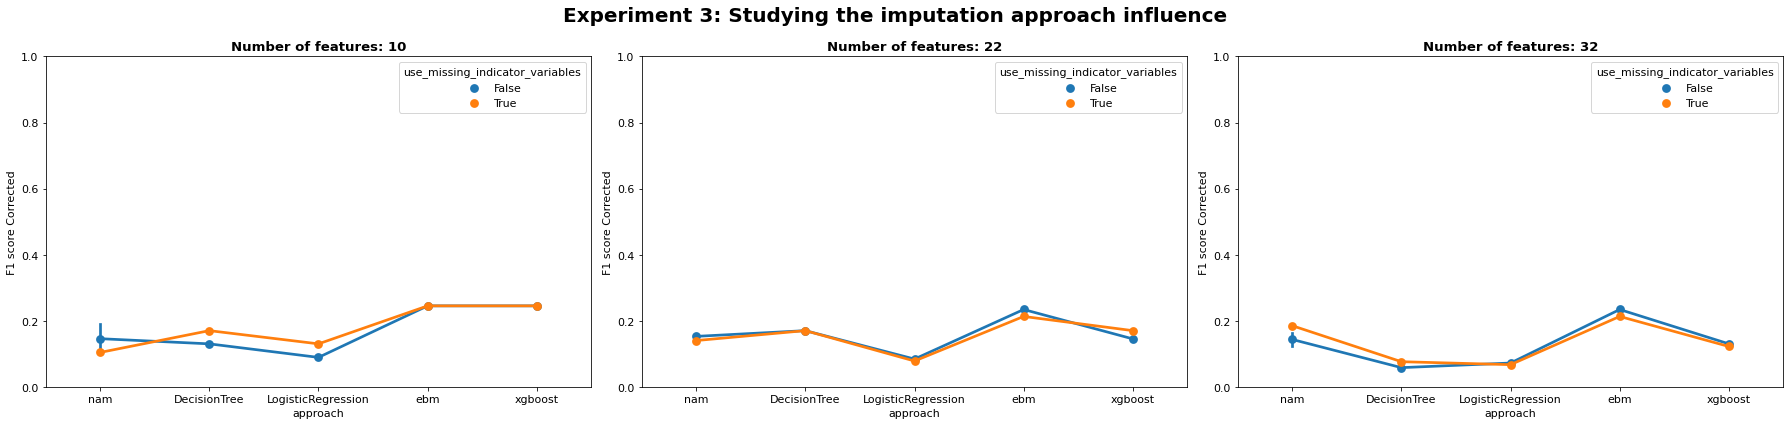

In [163]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers_remote']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]


        axes[i] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue='use_missing_indicator_variables', ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

    plt.tight_layout()

## Experiment 2  `scale_data`

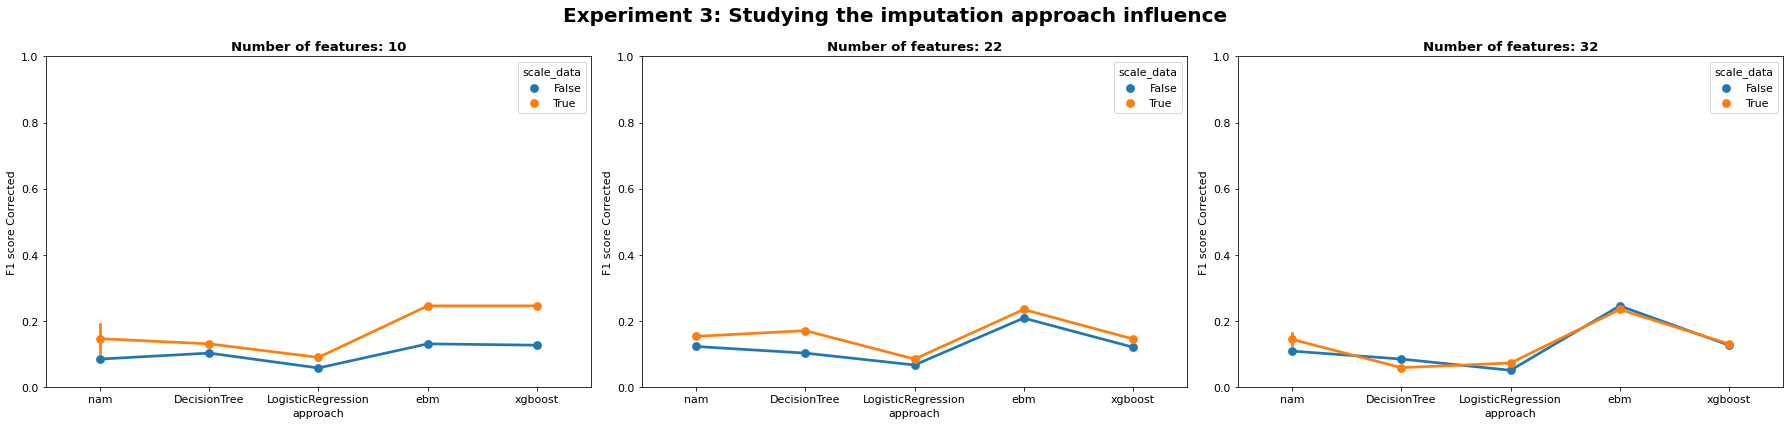

In [164]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers_remote']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['sampling_method'] == 'without') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue

        #assert len(results) == 5*2

        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue='scale_data', ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

## Experiment 3. `Imputation approach`

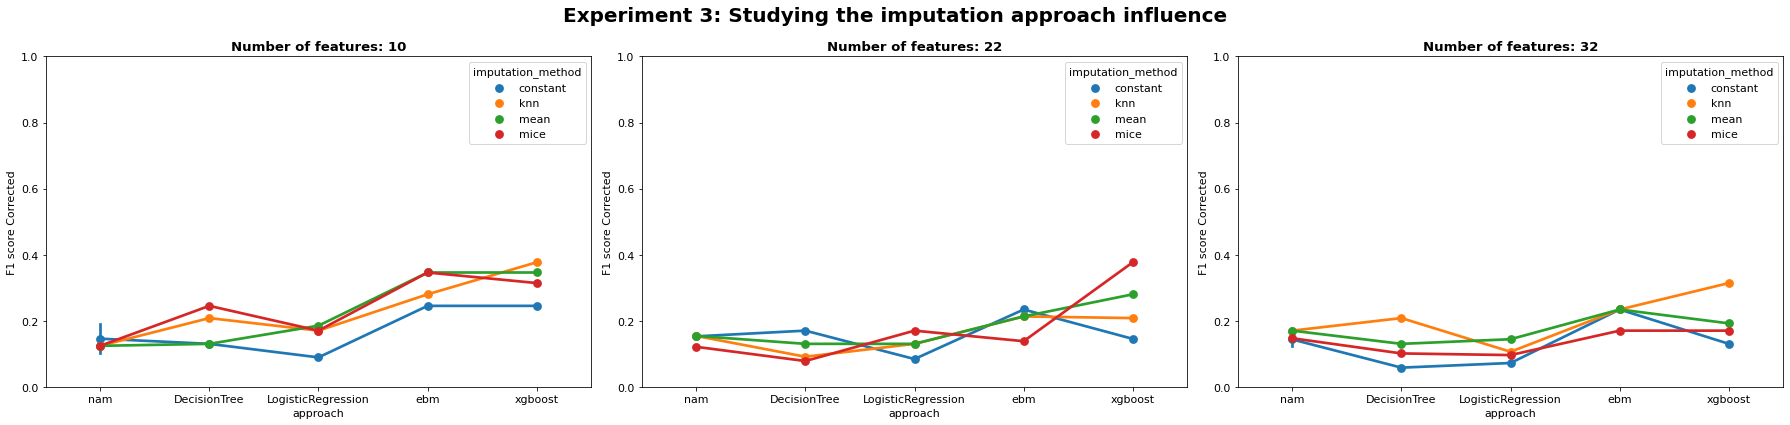

In [165]:
varying_condition = "imputation_method"


fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers_remote']):

        results = df[(df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue

        results = results.sort_values(by='imputation_method')

        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue=varying_condition, ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

## Experiment 4. `Sampling approach`

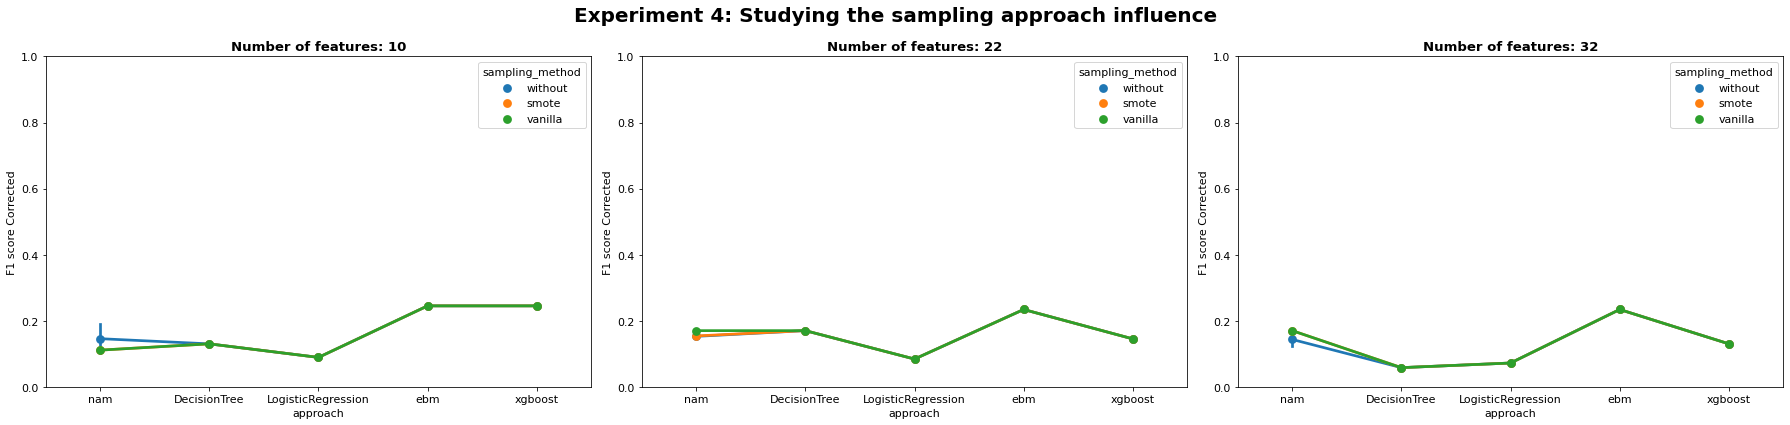

In [183]:
varying_condition = "sampling_method"


fig, axes = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Experiment 4: Studying the sampling approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique())):
    for j, scenario in enumerate(['papers_remote']):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['scale_data'] == True) &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]

        if len(results)==0:
            continue
                    
        axes[i]= sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue=varying_condition, ci='sd', ax = axes[i])
        axes[i].set_ylim([0,1])
        axes[i].set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()
plt.show()

## Experiment 6. `n_features`

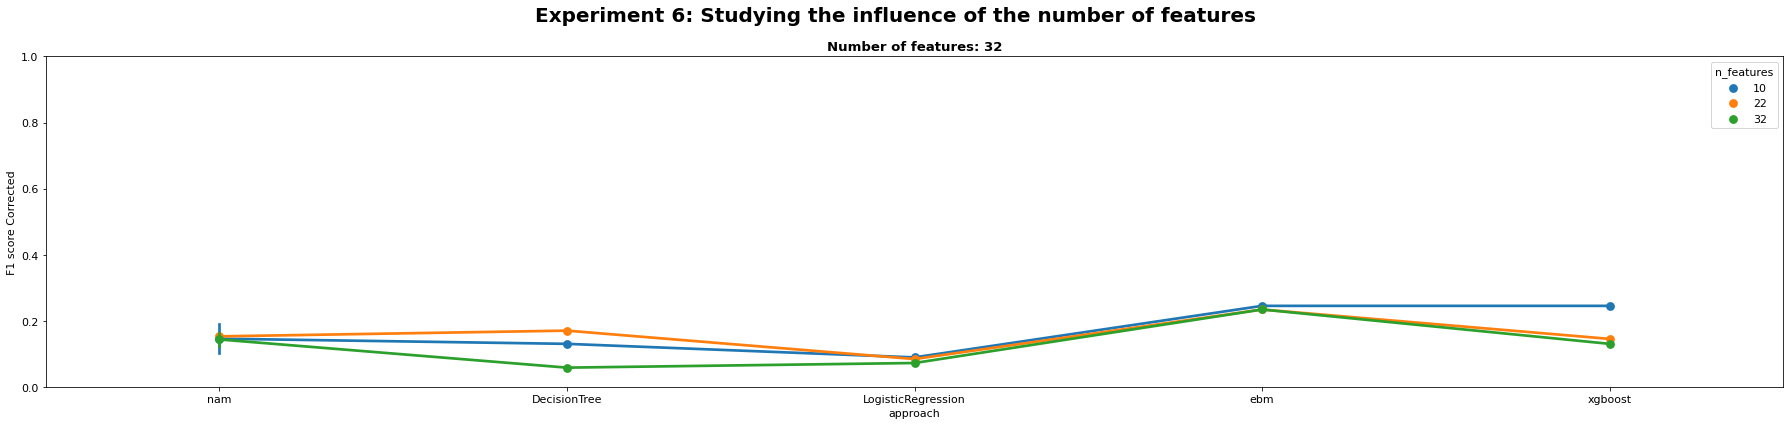

In [171]:

fig, axes = plt.subplots(1, 1, figsize=(25, 6))
fig.suptitle("Experiment 6: Studying the influence of the number of features", weight='bold', fontsize=20)


results = df[(df['missing_data_handling'] == 'encoding') &
             (df['use_missing_indicator_variables'] == False) &
             (df['scale_data'] == True) &
             (df['sampling_method'] == 'without') &
             (df['n_features'] != 1) &
             (df['scenario'] == 'papers_remote')]


axes = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1 score Corrected", hue='n_features', ci='sd', ax = axes)
axes.set_ylim([0,1])
axes.set_title("Number of features: {}".format(n_features), weight='bold')

plt.tight_layout()

## Experiment 7. `approach`

In [195]:
df

,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
0,paper_experiment_1_fs_validation,11,nam,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,True,True,without,papers_remote,100,0.754386,0.235000,0.226475,0.246300,20,0.2,None,None,0.656,0.588,0.244,0.050,0.563,0.678,0.140,NaN,0.331,0.930,0.351,0.519,0.519,0.870,0.070,0.481,0.130
1,paper_experiment_1_fs_validation,3,DecisionTree,encoding,constant,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,True,True,without,papers_remote,100,0.754386,0.249000,0.240351,0.260465,20,0.2,None,None,0.558,0.506,0.085,0.118,0.916,0.601,0.170,NaN,-0.116,0.977,0.000,0.424,0.424,0.000,0.023,0.576,1.000
2,paper_experiment_1_fs_validation,6,nam,encoding,constant,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,True,without,papers_remote,100,0.754386,0.497000,0.480702,0.518605,20,0.2,None,None,0.675,0.584,0.308,0.064,0.181,0.690,0.111,NaN,0.362,0.907,0.421,0.542,0.542,0.857,0.093,0.458,0.143
3,paper_experiment_1_fs_validation,16,nam,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers_remote,100,0.754386,0.470000,0.452951,0.492600,20,0.2,None,None,0.670,0.614,0.261,0.096,0.856,0.672,0.150,NaN,0.318,0.953,0.298,0.506,0.506,0.895,0.047,0.494,0.105
4,paper_experiment_1_fs_validation,26,nam,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.472187,0.461075,0.486919,20,0.2,None,None,0.677,0.594,0.311,0.067,0.491,0.683,0.122,NaN,0.346,0.930,0.368,0.526,0.526,0.875,0.070,0.474,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,paper_experiment_4_fs_validation,7,DecisionTree,encoding,constant,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,vanilla,papers_remote,100,0.754386,0.498000,0.480702,0.520930,20,0.2,None,None,0.558,0.500,0.085,0.097,0.904,0.601,0.130,NaN,-0.116,0.977,0.000,0.424,0.424,0.000,0.023,0.576,1.000
146,paper_experiment_4_fs_validation,34,ebm,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.472187,0.461075,0.486919,20,0.2,None,None,0.679,0.608,0.323,0.062,0.577,0.678,0.234,NaN,0.331,0.907,0.386,0.527,0.527,0.846,0.093,0.473,0.154
147,paper_experiment_4_fs_validation,39,ebm,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,vanilla,papers_remote,100,0.754386,0.472187,0.461075,0.486919,20,0.2,None,None,0.679,0.608,0.323,0.062,0.577,0.678,0.234,NaN,0.331,0.907,0.386,0.527,0.527,0.846,0.093,0.473,0.154
148,paper_experiment_4_fs_validation,37,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,vanilla,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410


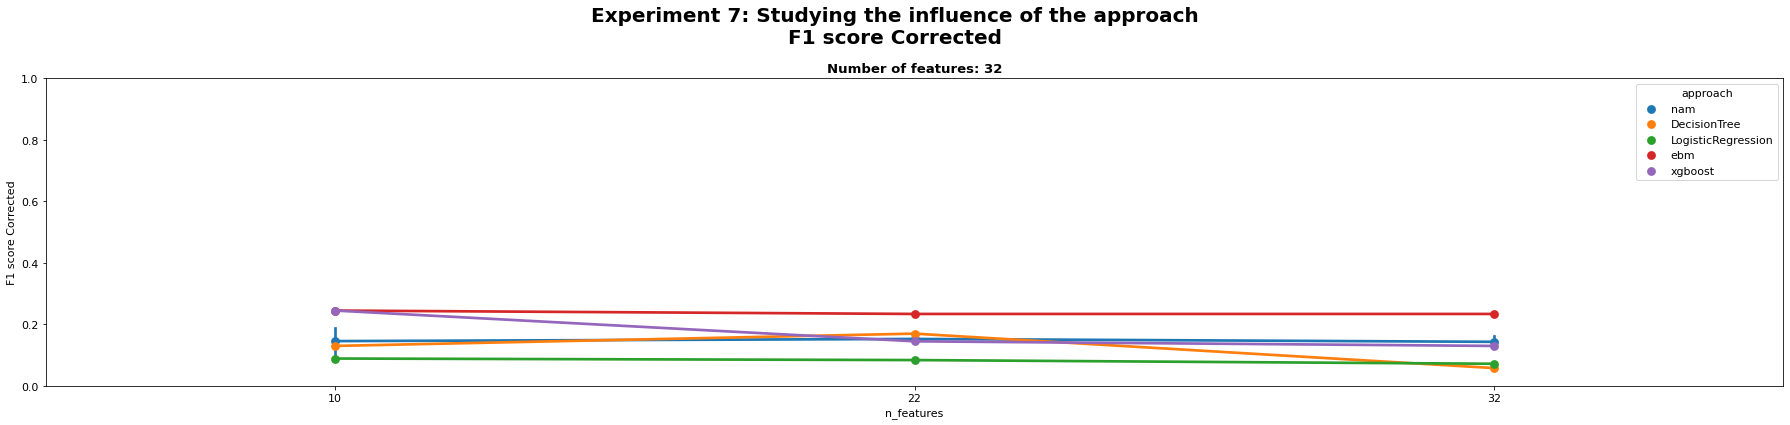

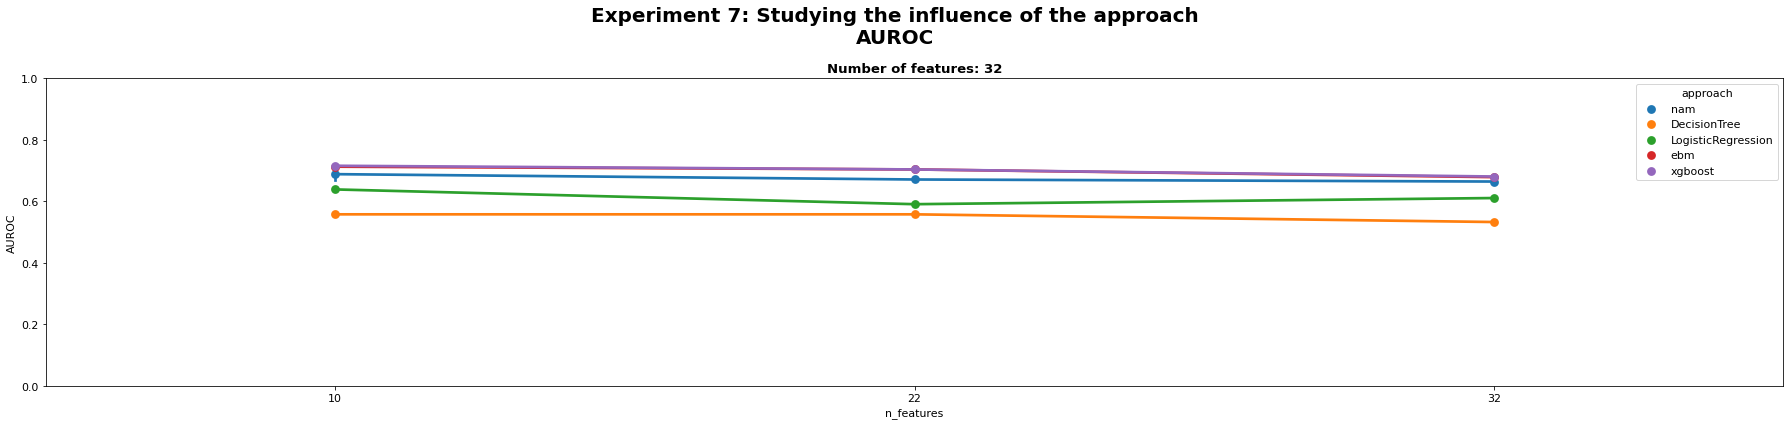

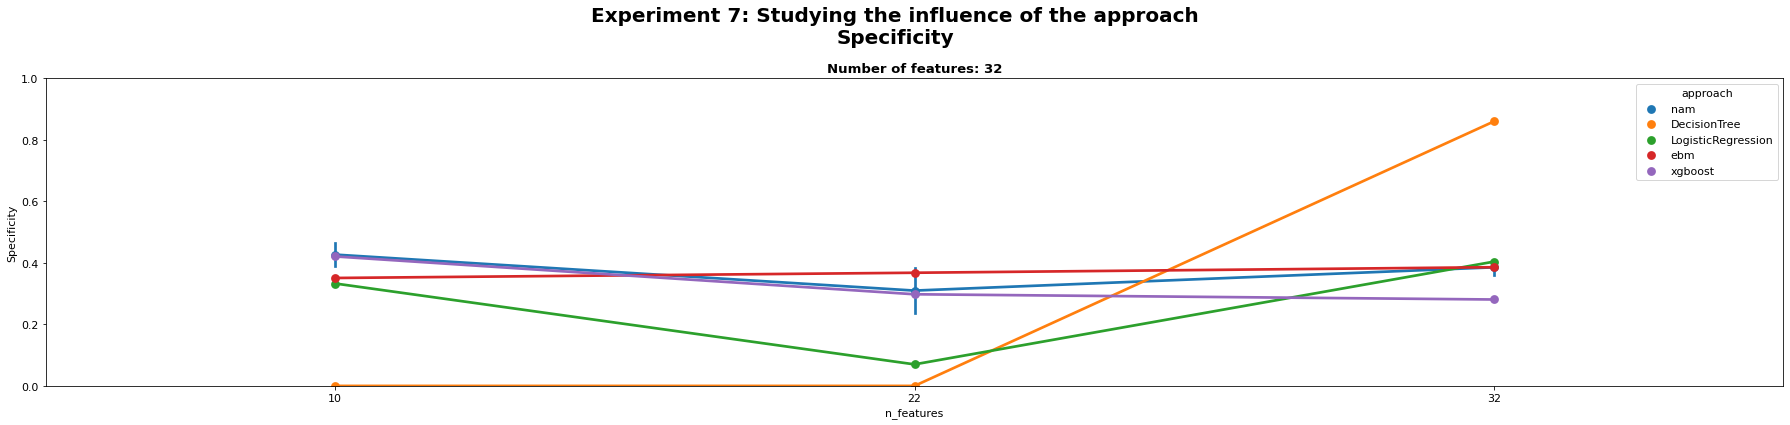

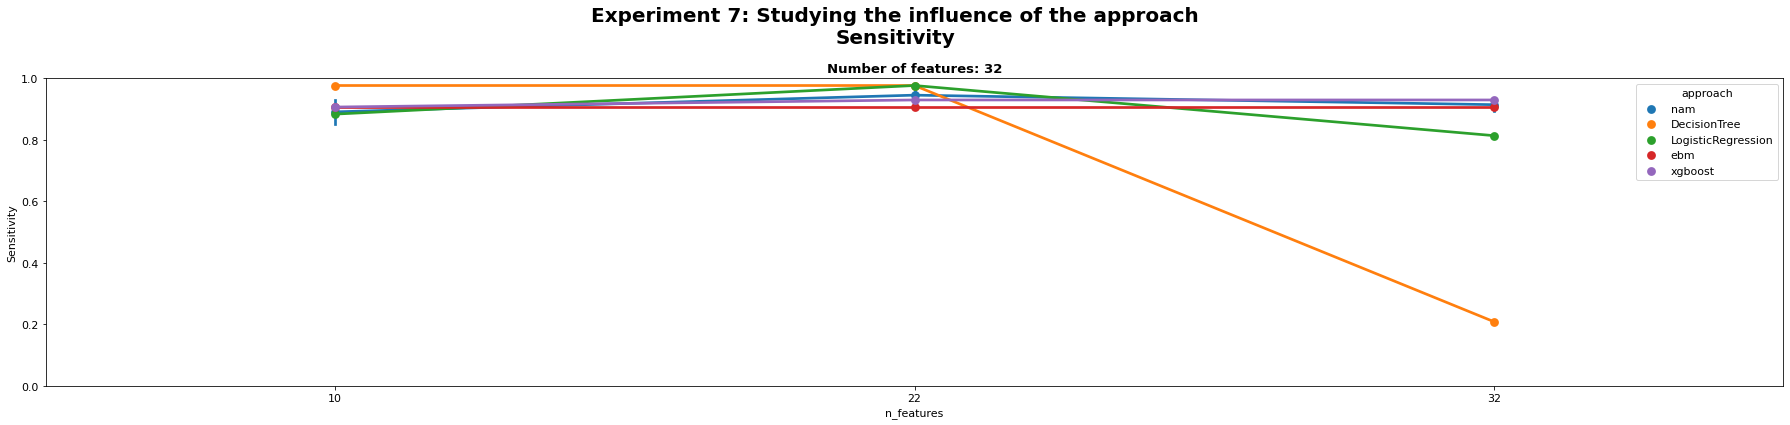

In [197]:
for metric in ['F1 score Corrected', 'AUROC', 'Specificity', 'Sensitivity']:
    fig, axes = plt.subplots(1, 1, figsize=(25, 6))
    fig.suptitle("Experiment 7: Studying the influence of the approach\n{}".format(metric), weight='bold', fontsize=20)


    results = df[(df['missing_data_handling'] == 'encoding') &
                 (df['use_missing_indicator_variables'] == False) &
                 (df['scale_data'] == True) &
                 (df['sampling_method'] == 'without') &
                 (df['scenario'] == 'papers_remote')]


    axes = sns.pointplot(data=results, x="n_features", y=metric, hue='approach', ci='sd', ax = axes)
    axes.set_ylim([0,1])
    axes.set_title("Number of features: {}".format(n_features), weight='bold')

    plt.tight_layout()

In [174]:
df.sort_values(by='F1 score Corrected')

for scenario, results in df.groupby('scenario'):
    print("\n\n\nScenatio: {}".format(scenario))
    display(results.sort_values(by=['F1 score Corrected'], ascending = False).head(10))




Scenatio: papers_remote


,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
98,paper_experiment_3_fs_validation,20,xgboost,imputation,mice,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers_remote,100,0.754386,0.465455,0.448166,0.488372,20,0.2,None,None,0.681,0.674,0.422,0.266,0.965,0.641,0.377,NaN,0.214,0.930,0.228,0.476,0.476,0.812,0.070,0.524,0.188
90,paper_experiment_3_fs_validation,10,xgboost,imputation,knn,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,without,papers_remote,100,0.754386,0.477000,0.463158,0.495349,20,0.2,None,None,0.660,0.649,0.273,0.261,0.960,0.639,0.377,NaN,0.222,0.860,0.333,0.493,0.493,0.760,0.140,0.507,0.240
77,paper_experiment_3_fs_validation,15,xgboost,imputation,mean,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,without,papers_remote,100,0.754386,0.477000,0.463158,0.495349,20,0.2,None,None,0.671,0.651,0.315,0.245,0.962,0.645,0.346,NaN,0.235,0.884,0.316,0.494,0.494,0.783,0.116,0.506,0.217
80,paper_experiment_3_fs_validation,4,ebm,imputation,mice,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,True,without,papers_remote,100,0.754386,0.497000,0.480702,0.518605,20,0.2,None,None,0.615,0.610,0.195,0.235,0.943,0.628,0.346,NaN,0.187,0.860,0.298,0.481,0.481,0.739,0.140,0.519,0.261
96,paper_experiment_3_fs_validation,14,ebm,imputation,mean,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,True,without,papers_remote,100,0.754386,0.497000,0.480702,0.518605,20,0.2,None,None,0.670,0.634,0.315,0.237,0.953,0.679,0.346,NaN,0.336,0.860,0.456,0.544,0.544,0.812,0.140,0.456,0.188
84,paper_experiment_3_fs_validation,40,xgboost,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.659,0.647,0.336,0.221,0.957,0.629,0.314,NaN,0.200,0.884,0.281,0.481,0.481,0.762,0.116,0.519,0.238
76,paper_experiment_3_fs_validation,5,xgboost,imputation,mice,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,without,papers_remote,100,0.754386,0.477000,0.463158,0.495349,20,0.2,None,None,0.672,0.658,0.351,0.227,0.963,0.635,0.314,NaN,0.232,0.907,0.281,0.488,0.488,0.800,0.093,0.512,0.200
79,paper_experiment_3_fs_validation,30,xgboost,imputation,mean,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers_remote,100,0.754386,0.465455,0.448166,0.488372,20,0.2,None,None,0.668,0.643,0.320,0.204,0.955,0.643,0.280,NaN,0.249,0.814,0.421,0.515,0.515,0.750,0.186,0.485,0.250
72,paper_experiment_3_fs_validation,9,ebm,imputation,knn,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,True,without,papers_remote,100,0.754386,0.497000,0.480702,0.518605,20,0.2,None,None,0.707,0.662,0.462,0.201,0.950,0.673,0.280,NaN,0.325,0.837,0.474,0.545,0.545,0.794,0.163,0.455,0.206
135,paper_experiment_4_fs_validation,10,xgboost,encoding,constant,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,vanilla,papers_remote,100,0.754386,0.477000,0.463158,0.495349,20,0.2,None,None,0.716,0.659,0.413,0.183,0.954,0.690,0.245,NaN,0.362,0.907,0.421,0.542,0.542,0.857,0.093,0.458,0.143


In [176]:
df.sort_values(by='Sensitivity', ascending=False)

,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
149,paper_experiment_4_fs_validation,21,LogisticRegression,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,vanilla,papers_remote,100,0.754386,0.471818,0.459330,0.488372,20,0.2,None,None,0.591,0.510,0.237,0.053,-0.283,0.619,0.084,NaN,0.107,0.977,0.070,0.442,0.442,0.800,0.023,0.558,0.200
17,paper_experiment_1_fs_validation,25,xgboost,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,True,True,without,papers_remote,100,0.754386,0.236563,0.230537,0.244549,20,0.2,None,None,0.676,0.606,0.347,0.090,0.827,0.647,0.122,NaN,0.241,0.977,0.175,0.472,0.472,0.909,0.023,0.528,0.091
50,paper_experiment_2_fs_validation,12,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers_remote,100,0.754386,0.467273,0.448963,0.491543,20,0.2,None,None,0.558,0.506,0.085,0.118,0.916,0.601,0.170,NaN,-0.116,0.977,0.000,0.424,0.424,0.000,0.023,0.576,1.000
57,paper_experiment_2_fs_validation,2,DecisionTree,encoding,constant,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,without,papers_remote,100,0.754386,0.498000,0.480702,0.520930,20,0.2,None,None,0.558,0.500,0.085,0.097,0.904,0.601,0.130,NaN,-0.116,0.977,0.000,0.424,0.424,0.000,0.023,0.576,1.000
64,paper_experiment_3_fs_validation,43,nam,imputation,mean,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.472187,0.461075,0.486919,20,0.2,None,None,0.656,0.601,0.265,0.133,0.918,0.683,0.170,NaN,0.354,0.977,0.298,0.512,0.512,0.944,0.023,0.488,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,paper_experiment_4_fs_validation,42,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,smote,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410
8,paper_experiment_1_fs_validation,23,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,True,True,without,papers_remote,100,0.754386,0.236563,0.230537,0.244549,20,0.2,None,None,0.535,0.465,0.058,0.028,0.623,0.601,0.076,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410
16,paper_experiment_1_fs_validation,28,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410
52,paper_experiment_2_fs_validation,22,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410


In [177]:
df.sort_values(by='Specificity', ascending=False)

,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
100,paper_experiment_3_fs_validation,7,DecisionTree,imputation,knn,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,without,papers_remote,100,0.754386,0.498000,0.480702,0.520930,20,0.2,None,None,0.593,0.535,0.160,0.142,0.937,0.601,0.208,NaN,0.224,0.279,0.895,0.667,0.667,0.622,0.721,0.333,0.378
16,paper_experiment_1_fs_validation,28,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410
148,paper_experiment_4_fs_validation,37,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,vanilla,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410
58,paper_experiment_2_fs_validation,7,DecisionTree,encoding,constant,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,False,without,papers_remote,100,0.754386,0.498000,0.480702,0.520930,20,0.2,None,None,0.585,0.505,0.154,0.034,0.635,0.601,0.102,NaN,0.197,0.302,0.860,0.619,0.619,0.620,0.698,0.381,0.380
52,paper_experiment_2_fs_validation,22,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,paper_experiment_4_fs_validation,17,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,without,papers_remote,100,0.754386,0.467273,0.448963,0.491543,20,0.2,None,None,0.558,0.506,0.085,0.118,0.916,0.601,0.170,NaN,-0.116,0.977,0.000,0.424,0.424,0.000,0.023,0.576,1.000
134,paper_experiment_4_fs_validation,12,DecisionTree,encoding,constant,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,smote,papers_remote,100,0.754386,0.498000,0.480702,0.520930,20,0.2,None,None,0.558,0.500,0.085,0.097,0.904,0.601,0.130,NaN,-0.116,0.977,0.000,0.424,0.424,0.000,0.023,0.576,1.000
116,paper_experiment_4_fs_validation,27,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'gaze_silhouette_sco...",22,False,True,smote,papers_remote,100,0.754386,0.467273,0.448963,0.491543,20,0.2,None,None,0.558,0.506,0.085,0.118,0.916,0.601,0.170,NaN,-0.116,0.977,0.000,0.424,0.424,0.000,0.023,0.576,1.000
18,paper_experiment_1_fs_validation,8,DecisionTree,encoding,constant,"['mean_gaze_percent_right', 'gaze_silhouette_s...",10,False,True,without,papers_remote,100,0.754386,0.498000,0.480702,0.520930,20,0.2,None,None,0.558,0.500,0.085,0.097,0.904,0.601,0.130,NaN,-0.116,0.977,0.000,0.424,0.424,0.000,0.023,0.576,1.000


In [178]:
df.sort_values(by='AUROC', ascending=False)

,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1,F1 score Corrected,Accuracy,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
75,paper_experiment_3_fs_validation,41,LogisticRegression,imputation,mean,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.475000,0.466557,0.486192,20,0.2,None,None,0.770,0.642,0.630,0.075,0.124,0.735,0.144,NaN,0.477,0.814,0.667,0.648,0.648,0.826,0.186,0.352,0.174
104,paper_experiment_3_fs_validation,21,LogisticRegression,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers_remote,100,0.754386,0.471818,0.459330,0.488372,20,0.2,None,None,0.756,0.656,0.588,0.078,0.546,0.714,0.130,NaN,0.437,0.791,0.649,0.630,0.630,0.804,0.209,0.370,0.196
85,paper_experiment_3_fs_validation,36,LogisticRegression,imputation,knn,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.475000,0.466557,0.486192,20,0.2,None,None,0.734,0.613,0.515,0.048,0.469,0.690,0.106,NaN,0.364,0.884,0.456,0.551,0.551,0.839,0.116,0.449,0.161
65,paper_experiment_3_fs_validation,26,LogisticRegression,imputation,mean,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,True,without,papers_remote,100,0.754386,0.471818,0.459330,0.488372,20,0.2,None,None,0.734,0.625,0.542,0.072,0.174,0.708,0.130,NaN,0.407,0.907,0.474,0.565,0.565,0.871,0.093,0.435,0.129
40,paper_experiment_2_fs_validation,9,ebm,encoding,constant,"['mean_gaze_percent_right', 'BB_gaze_silhouett...",10,False,False,without,papers_remote,100,0.754386,0.497000,0.480702,0.518605,20,0.2,None,None,0.722,0.650,0.463,0.118,0.900,0.685,0.130,NaN,0.356,0.744,0.614,0.593,0.593,0.761,0.256,0.407,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,paper_experiment_4_fs_validation,37,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,vanilla,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410
52,paper_experiment_2_fs_validation,22,DecisionTree,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.533,0.453,0.058,0.026,0.452,0.601,0.058,NaN,0.091,0.209,0.860,0.529,0.529,0.590,0.791,0.471,0.410
33,paper_experiment_2_fs_validation,16,LogisticRegression,encoding,constant,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",22,False,False,without,papers_remote,100,0.754386,0.471818,0.459330,0.488372,20,0.2,None,None,0.531,0.461,0.077,0.026,NaN,0.604,0.066,NaN,0.014,0.953,0.053,0.432,0.432,0.600,0.047,0.568,0.400
74,paper_experiment_3_fs_validation,32,DecisionTree,imputation,mice,"['BB_gaze_percent_right', 'BB_gaze_silhouette_...",32,False,True,without,papers_remote,100,0.754386,0.473125,0.461075,0.489099,20,0.2,None,None,0.524,0.478,0.079,0.032,0.653,0.601,0.101,NaN,-0.158,0.884,0.035,0.409,0.409,0.286,0.116,0.591,0.714


In [179]:
(df['Specificity'] + df['Sensitivity']).sort_values()

74     0.919
69     0.953
34     0.977
50     0.977
57     0.977
       ...  
83     1.369
65     1.381
70     1.404
104    1.440
75     1.481
Length: 150, dtype: float64

In [180]:
df.iloc[75]

dataset_name                                        paper_experiment_3_fs_validation
experiment_number                                                                 41
approach                                                          LogisticRegression
missing_data_handling                                                     imputation
imputation_method                                                               mean
features_name                      ['BB_gaze_percent_right', 'BB_gaze_silhouette_...
n_features                                                                        32
use_missing_indicator_variables                                                False
scale_data                                                                      True
sampling_method                                                              without
scenario                                                               papers_remote
num_samples                                                      